<a href="https://colab.research.google.com/github/ducanh0405/datastorm/blob/main/dataset_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create Python code to read, process, and analyze data, including tags for easy code maintenance and updates.

## Data cleaning

### Subtask:
Address missing values, incorrect data types, and inconsistencies in the dataset. Add tags to clearly identify this section.


## Data analysis

### Subtask:
Perform further analysis to extract insights or prepare the data for modeling. Add tags to organize this section.

**Reasoning**:
Analyze the relationships between categorical and numerical features (excluding the target), the relationship between multiple deliveries and other features, the combined impact of weather and traffic on delivery time, the distribution of delivery times across cities, and the impact of vehicle condition on delivery time, adding appropriate tags.

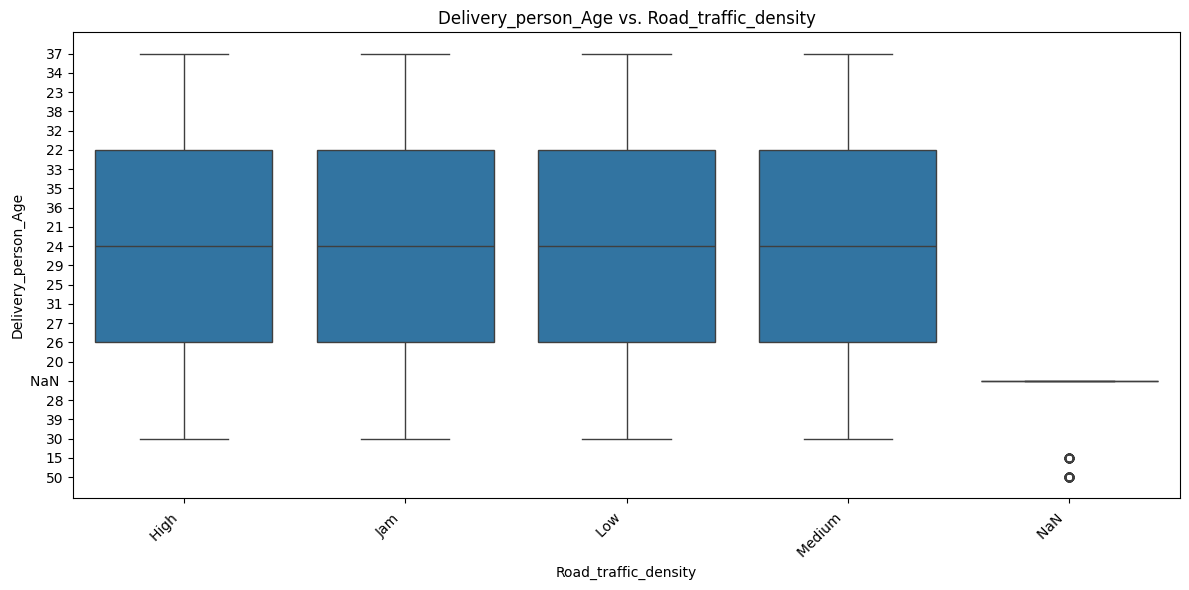

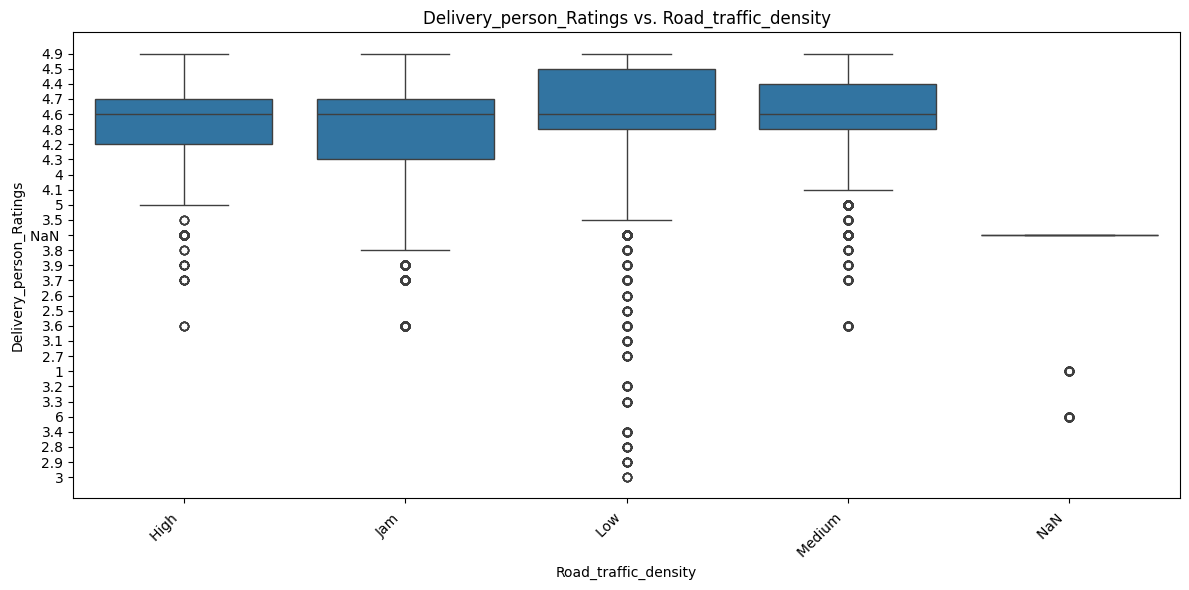

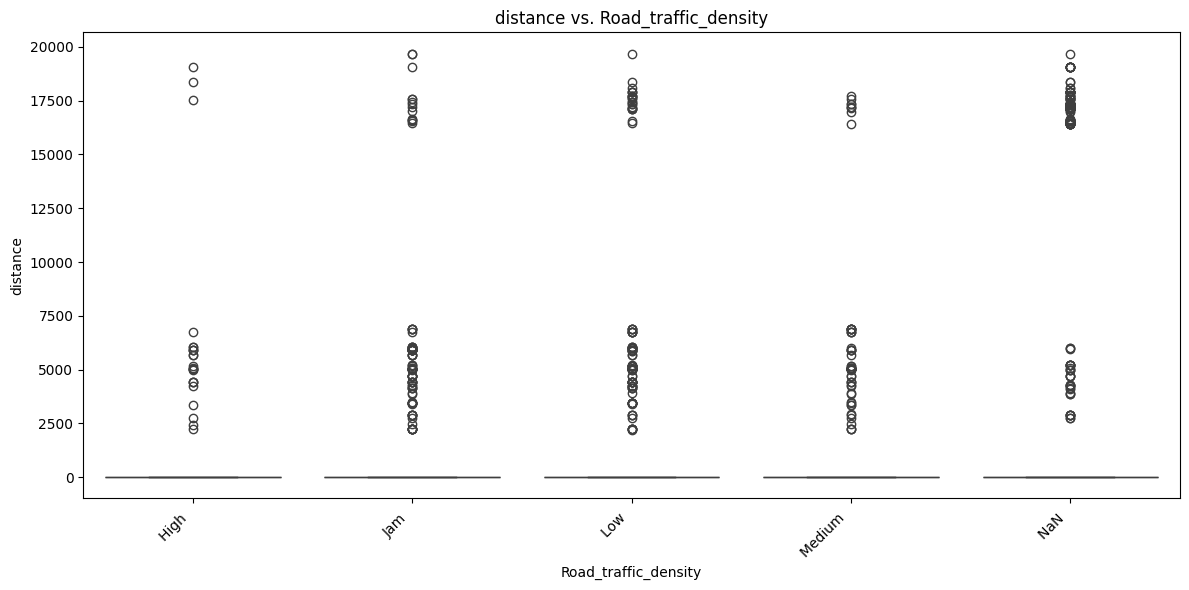

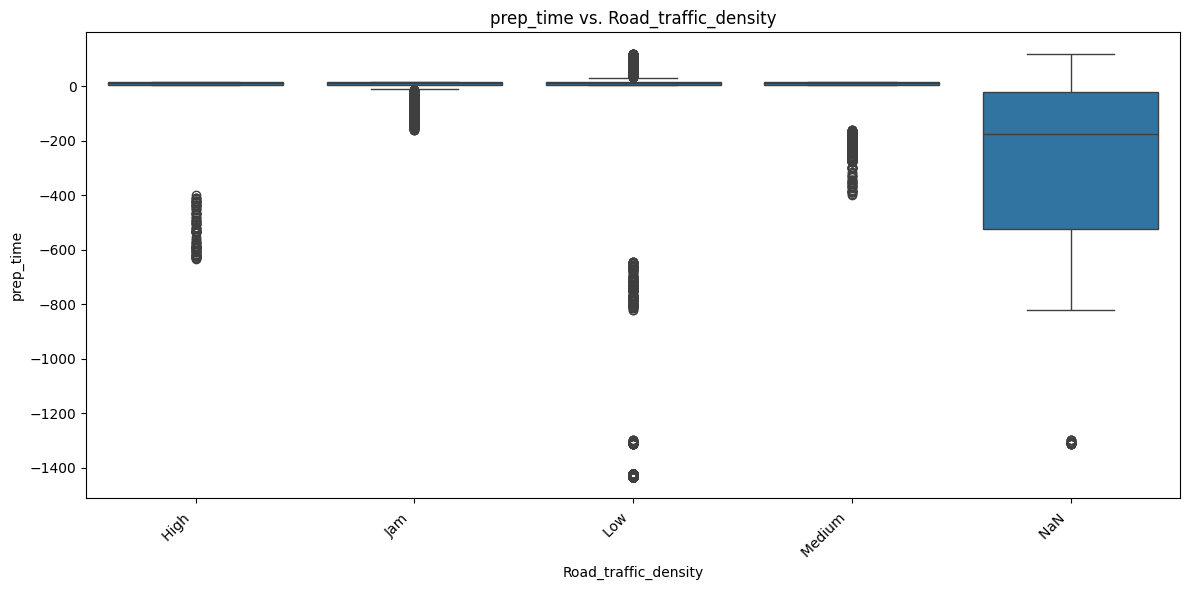

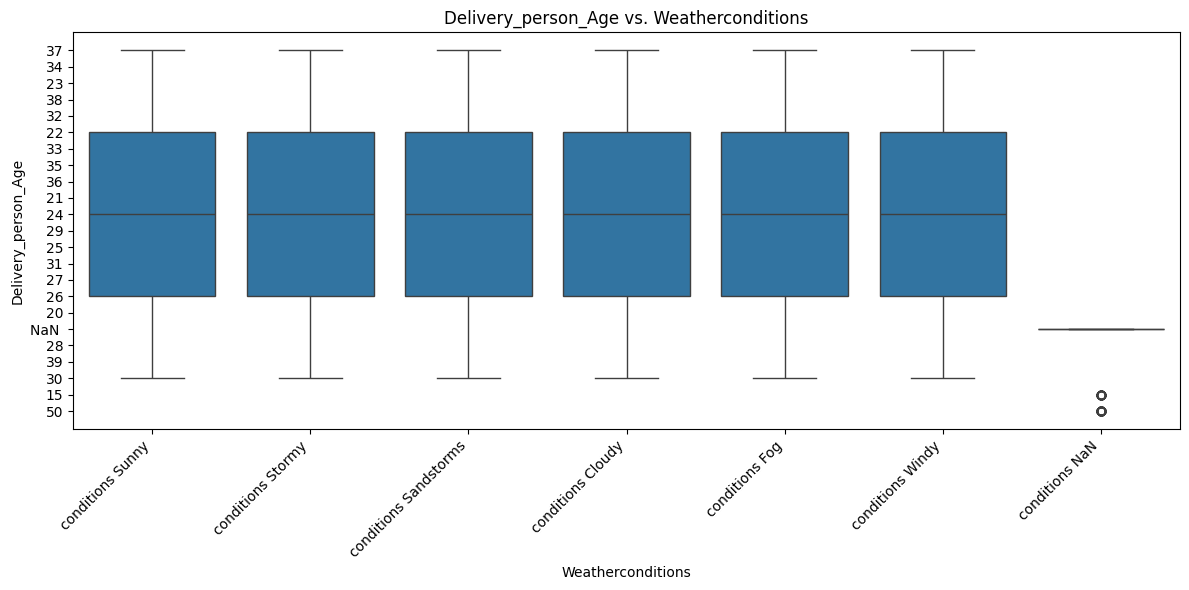

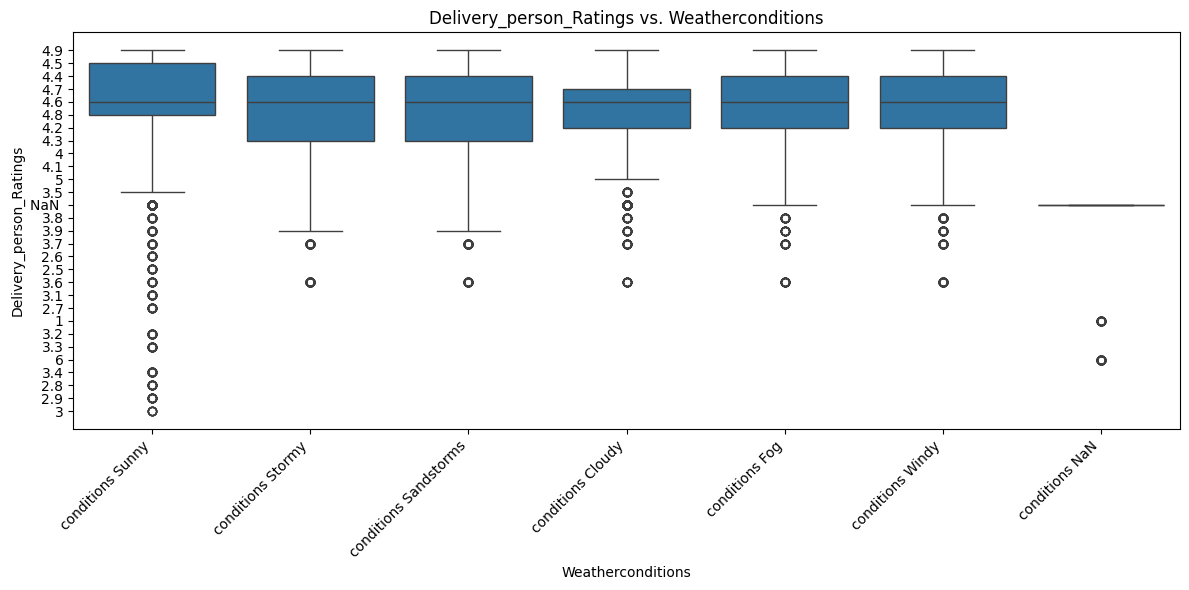

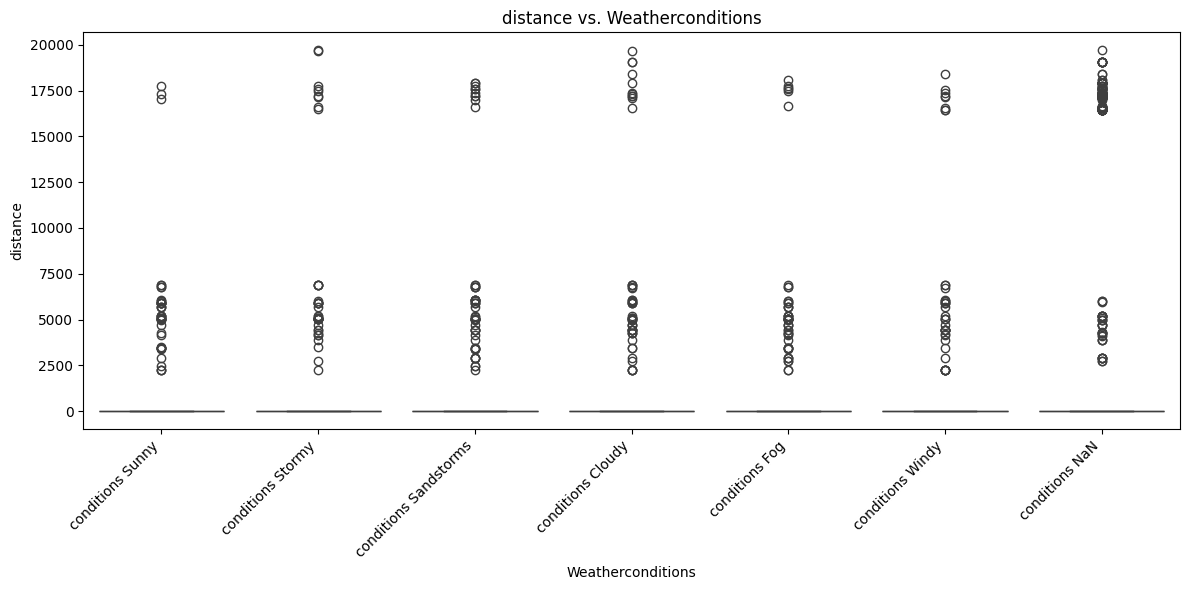

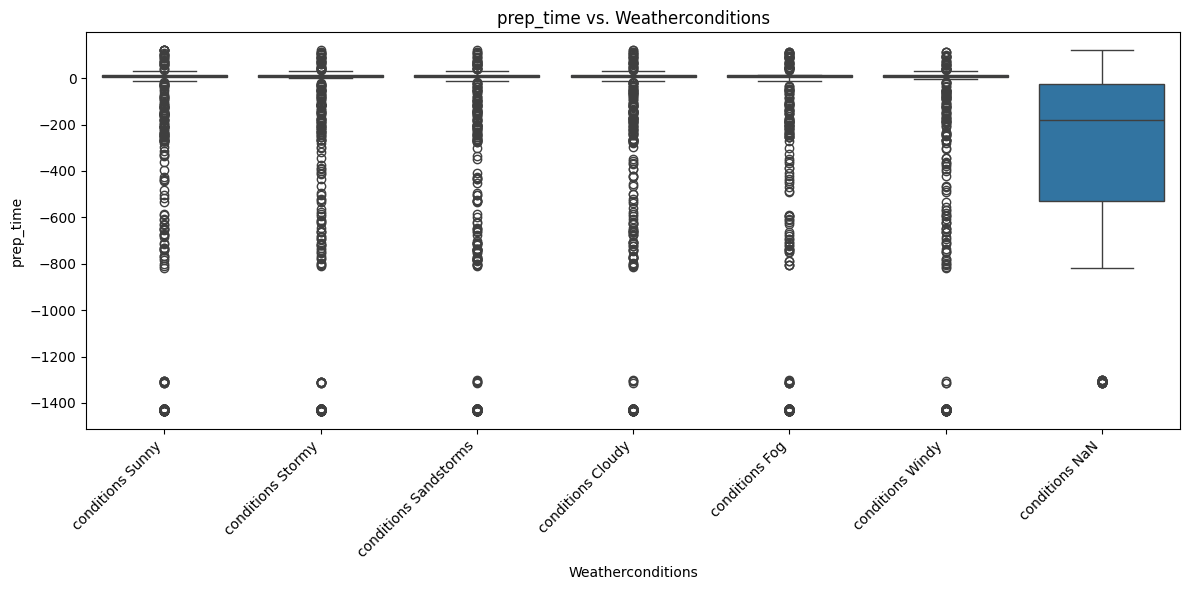

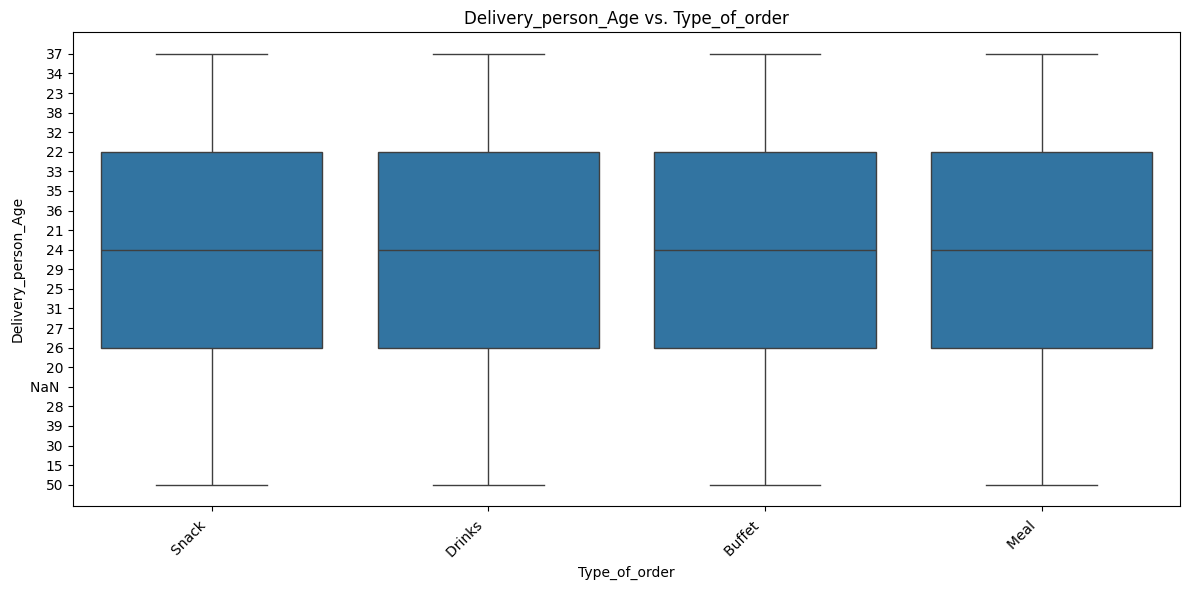

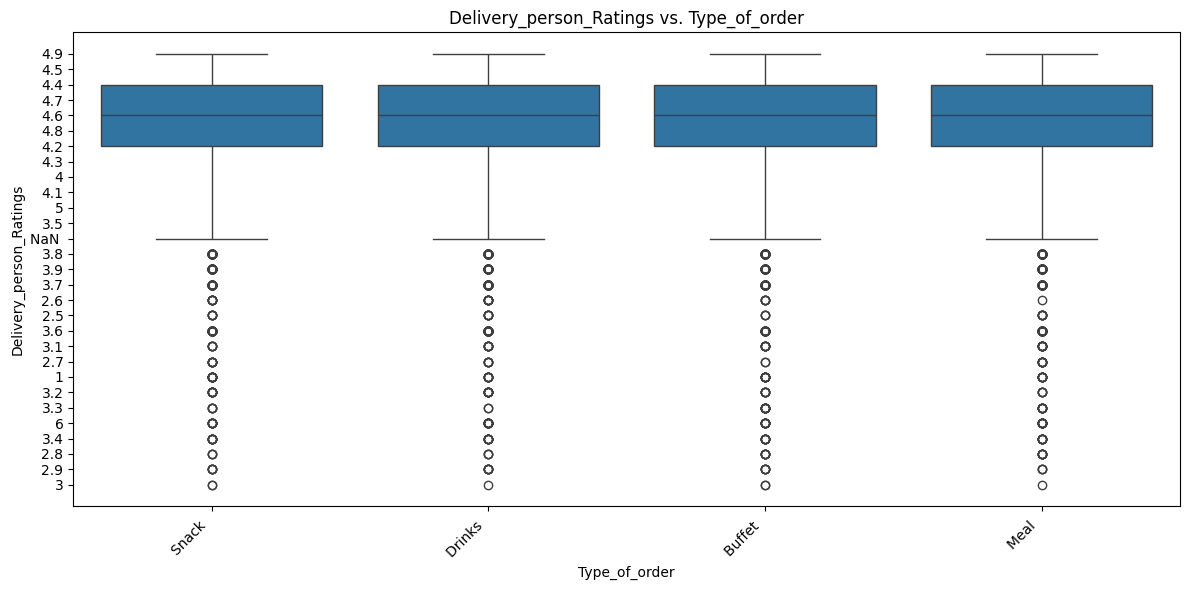

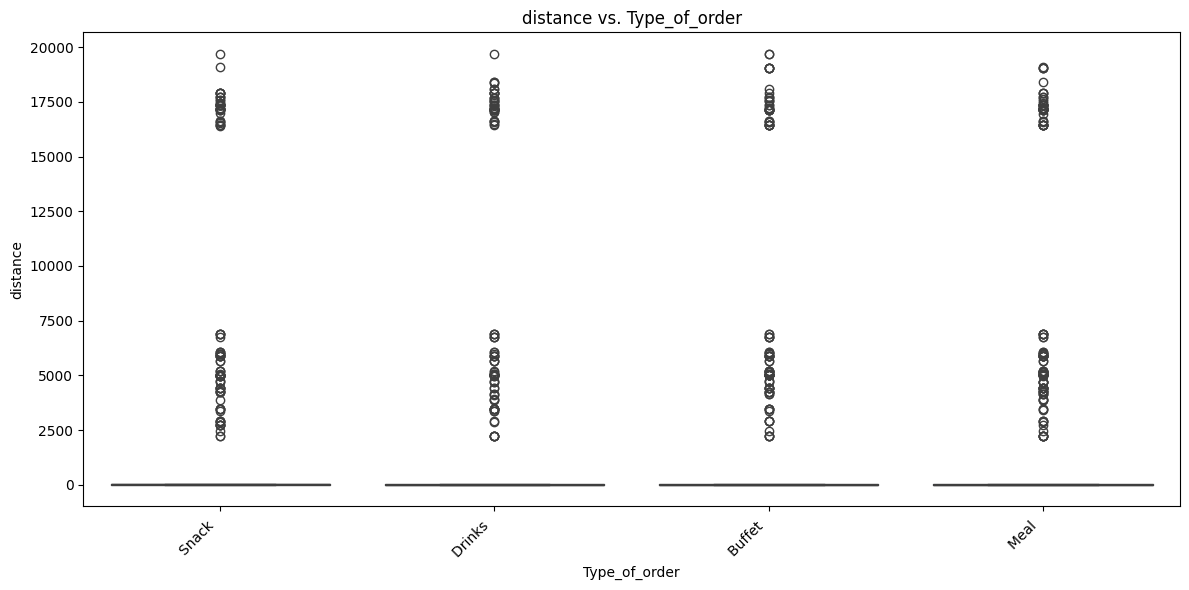

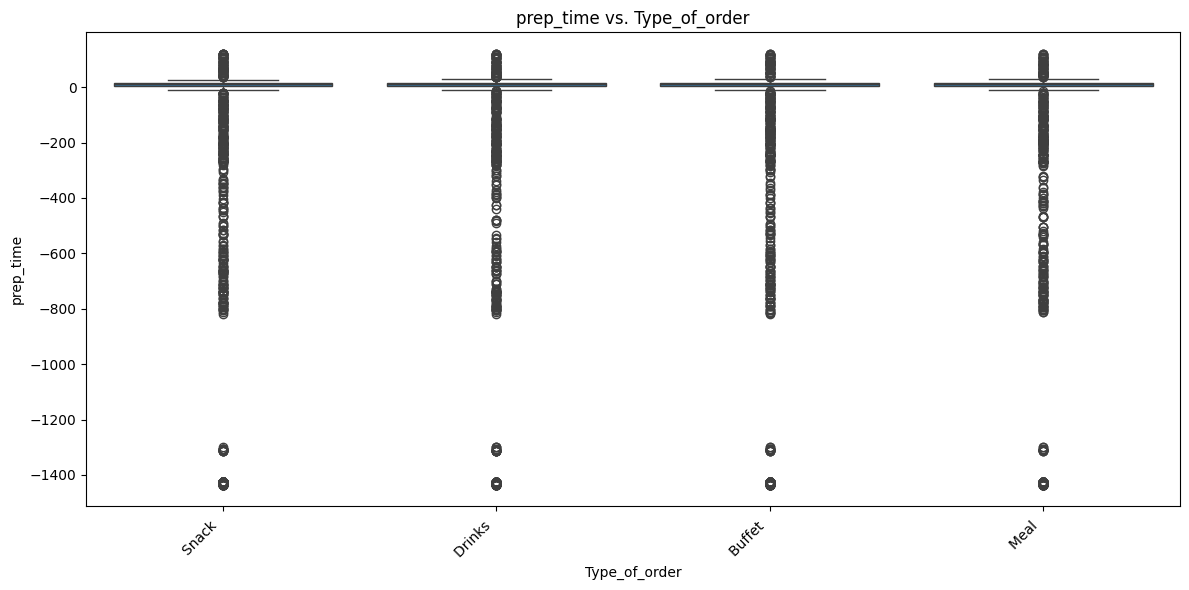

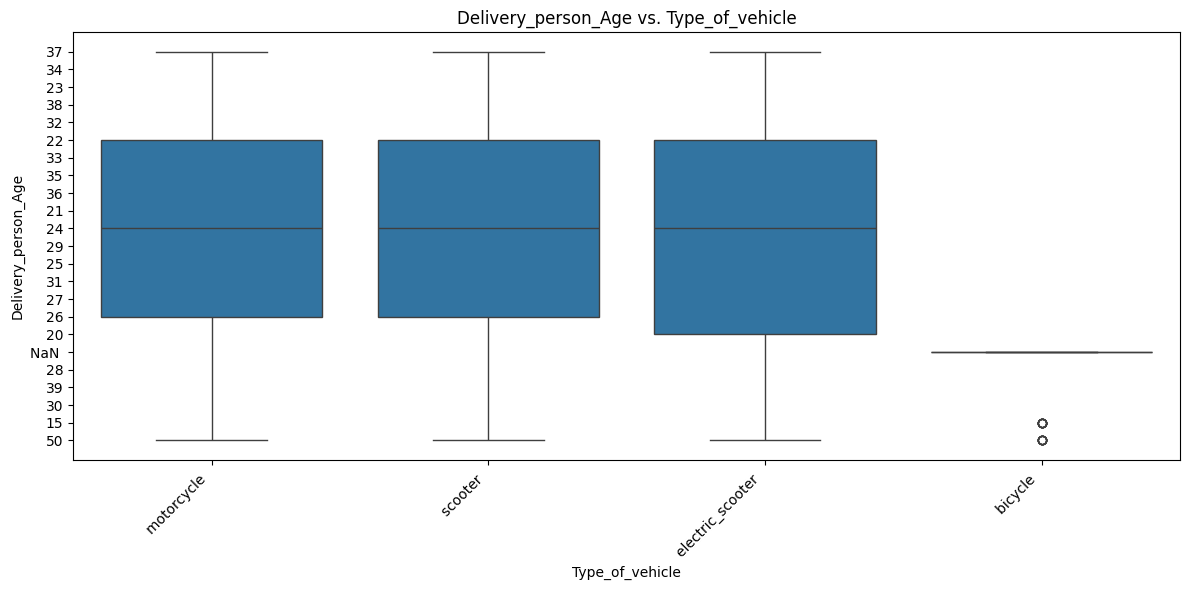

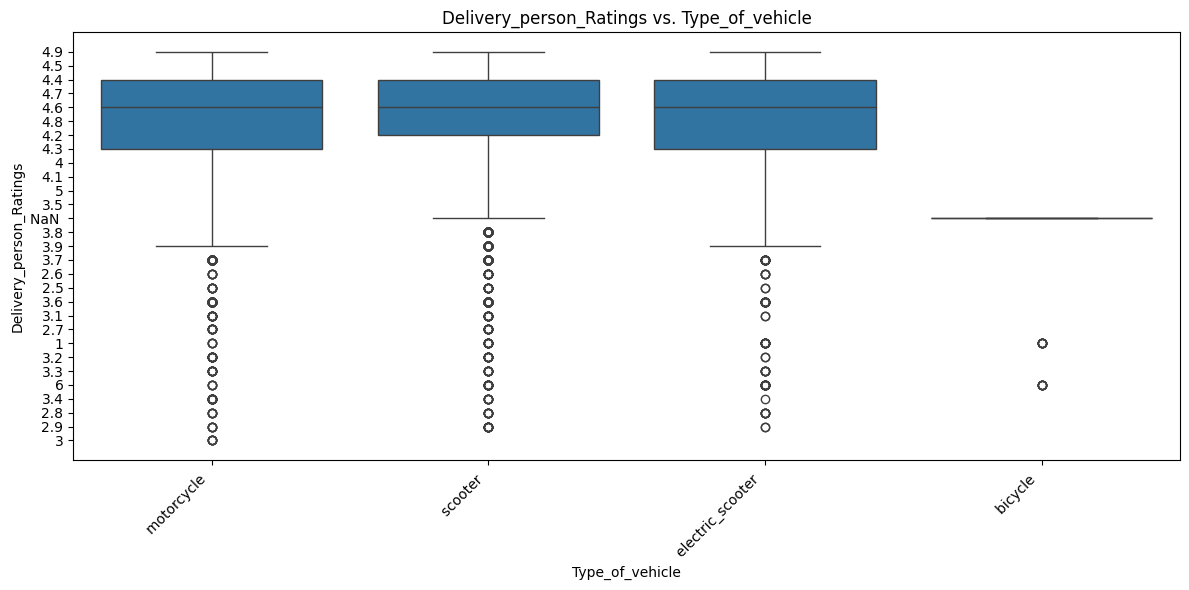

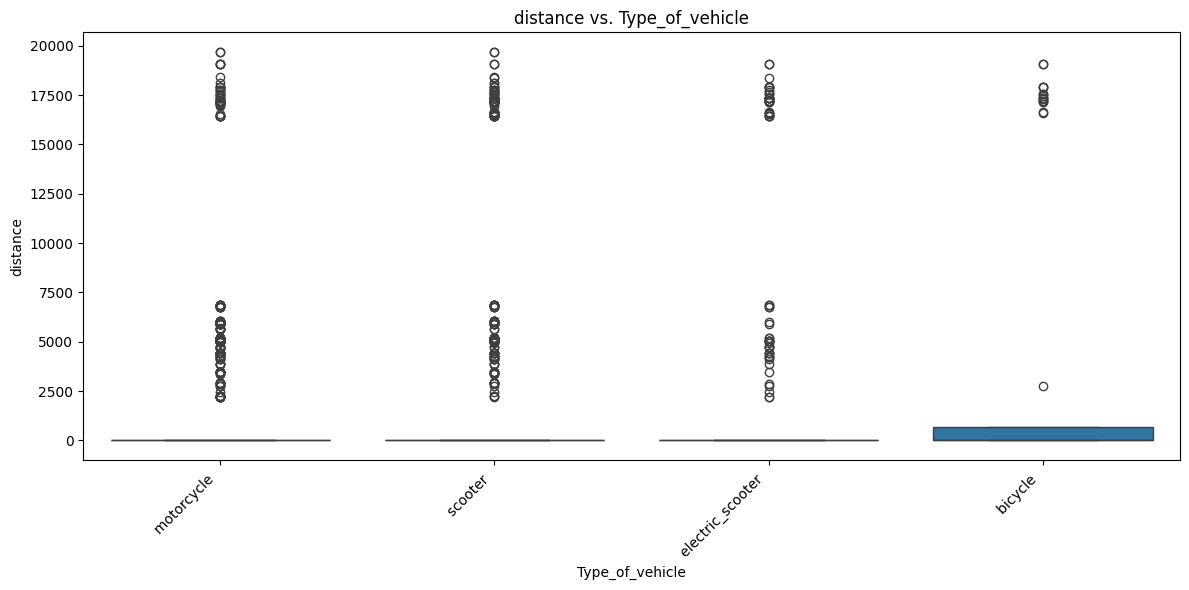

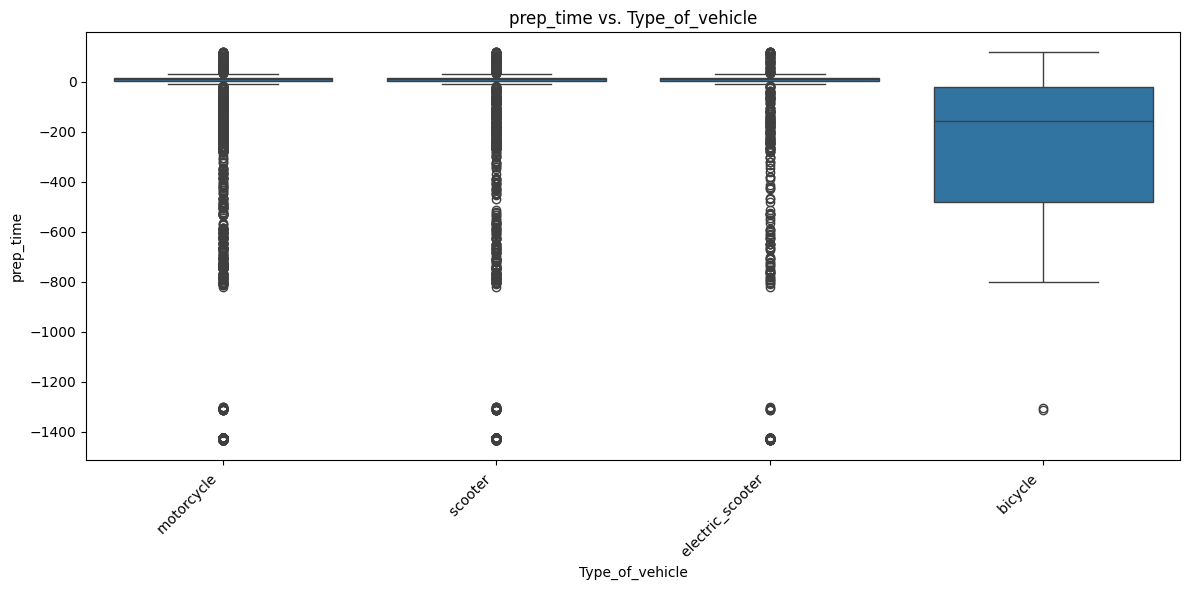

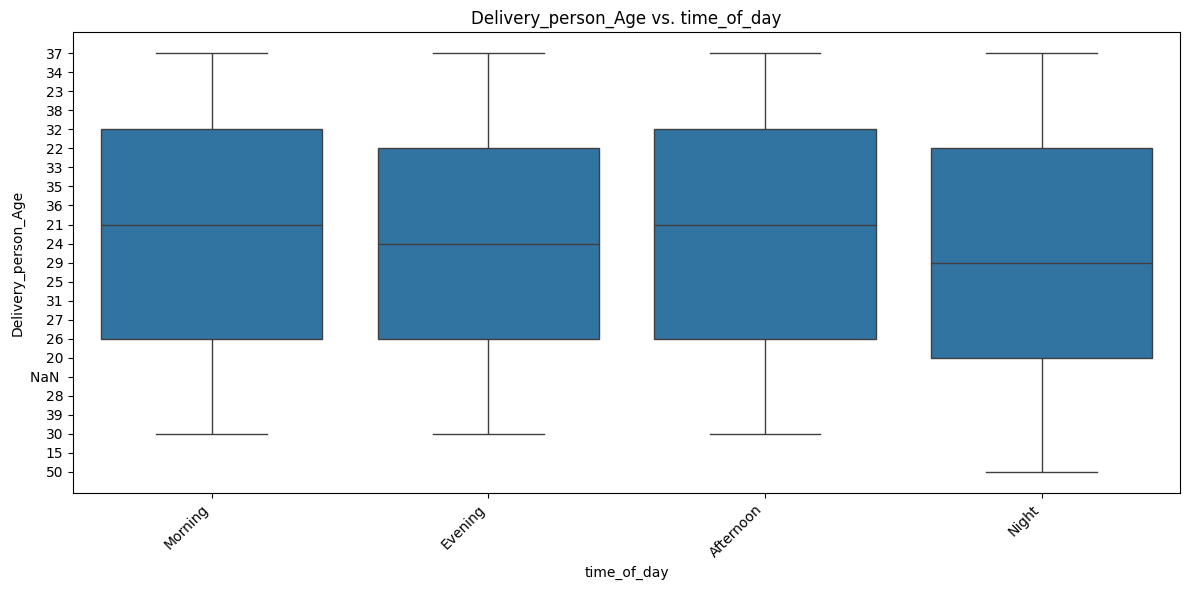

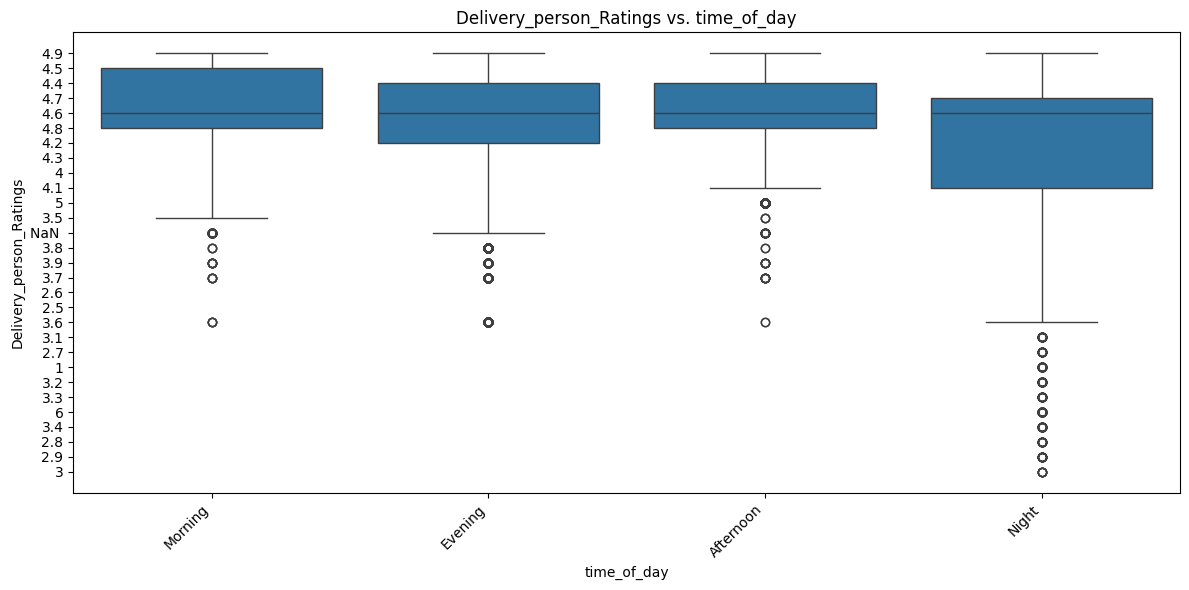

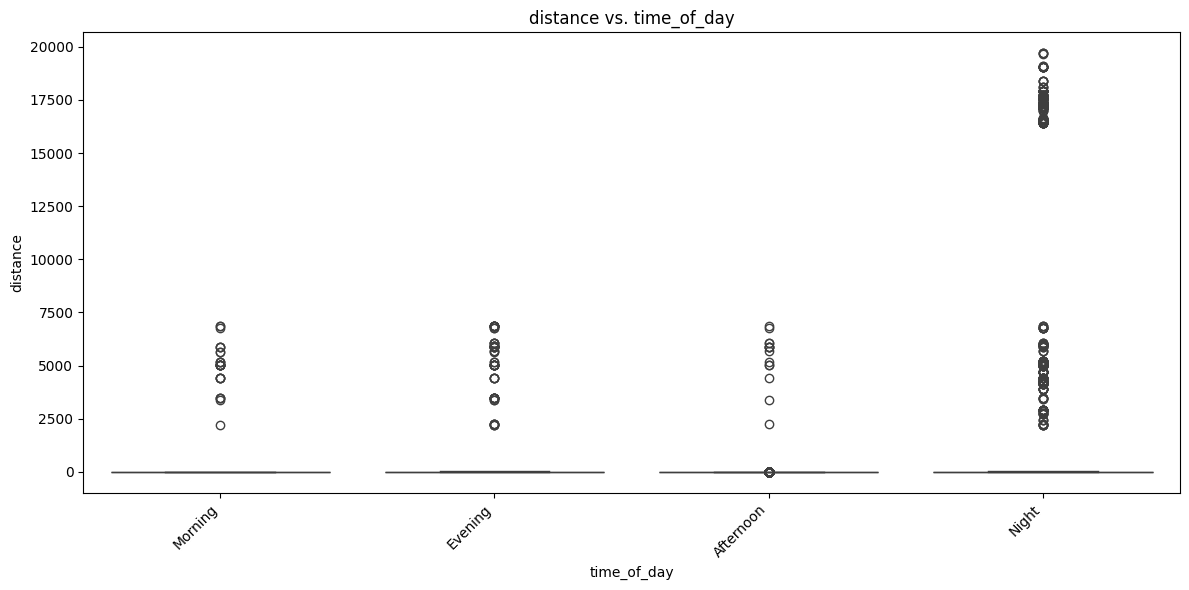

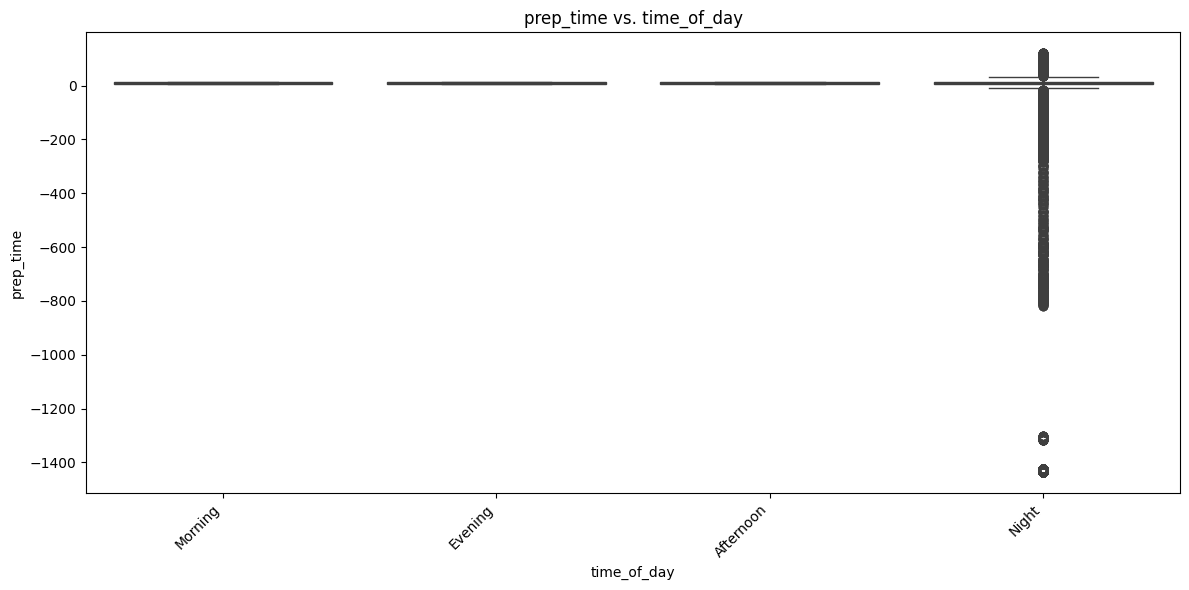

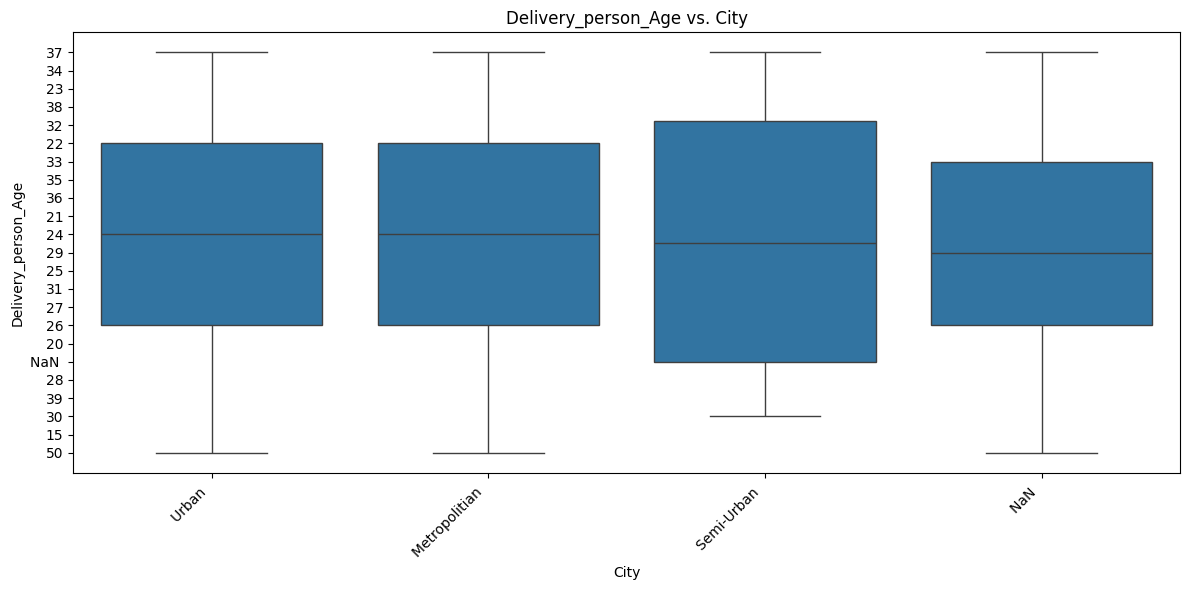

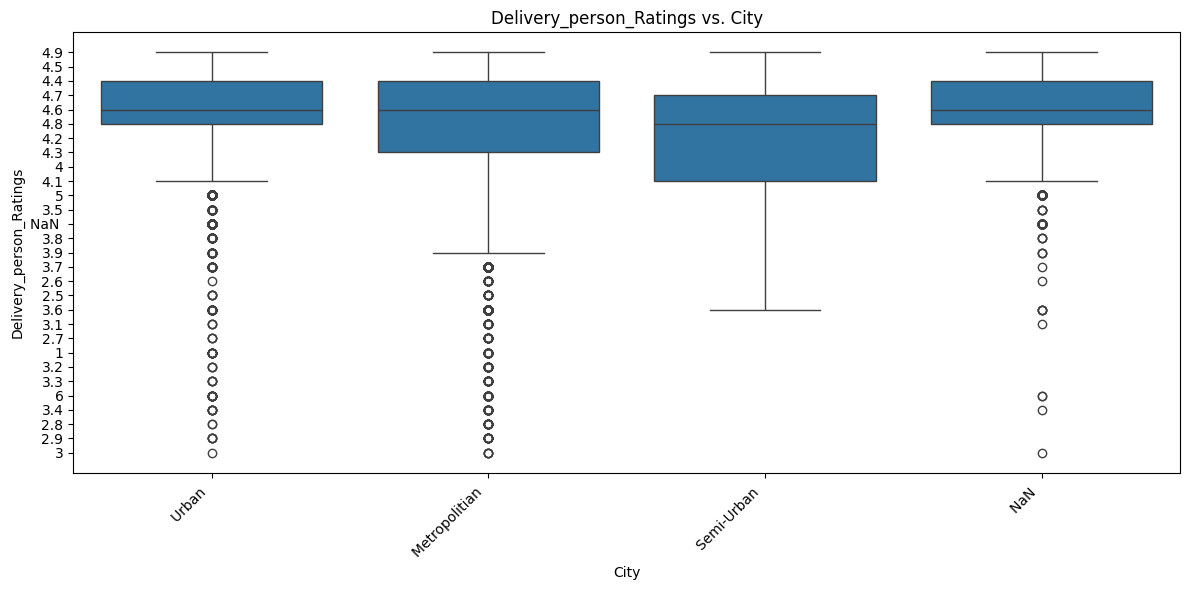

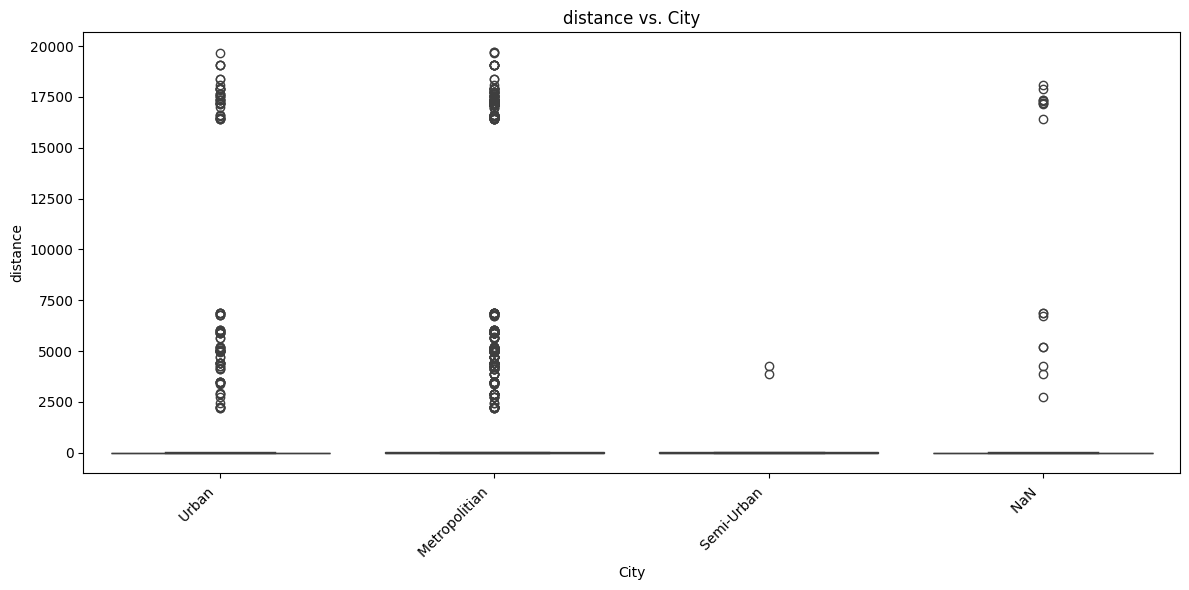

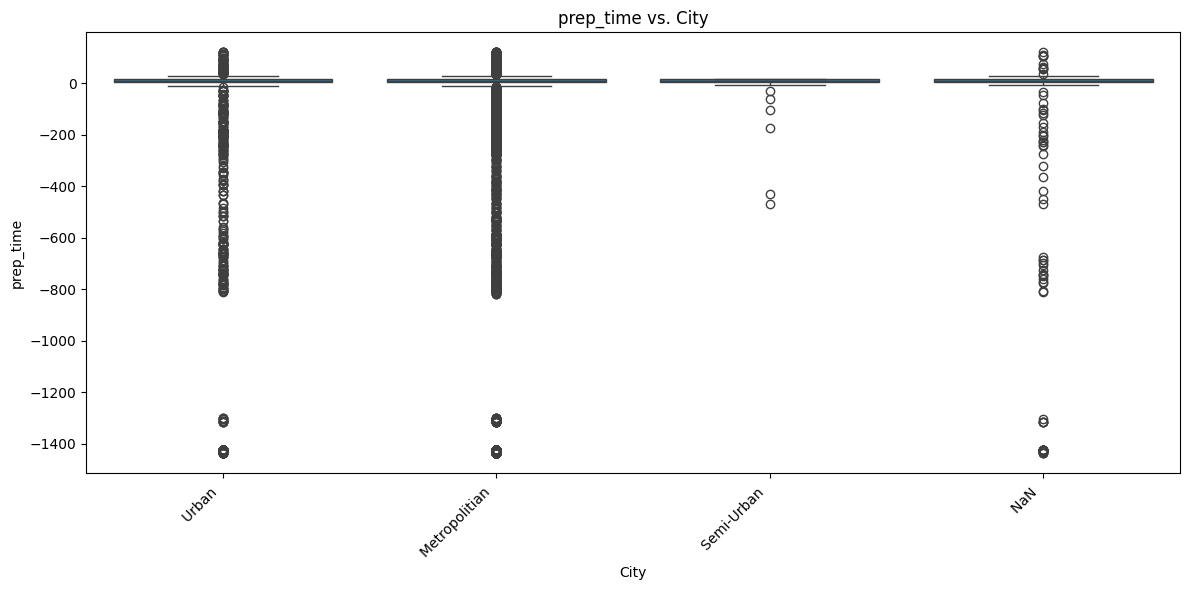

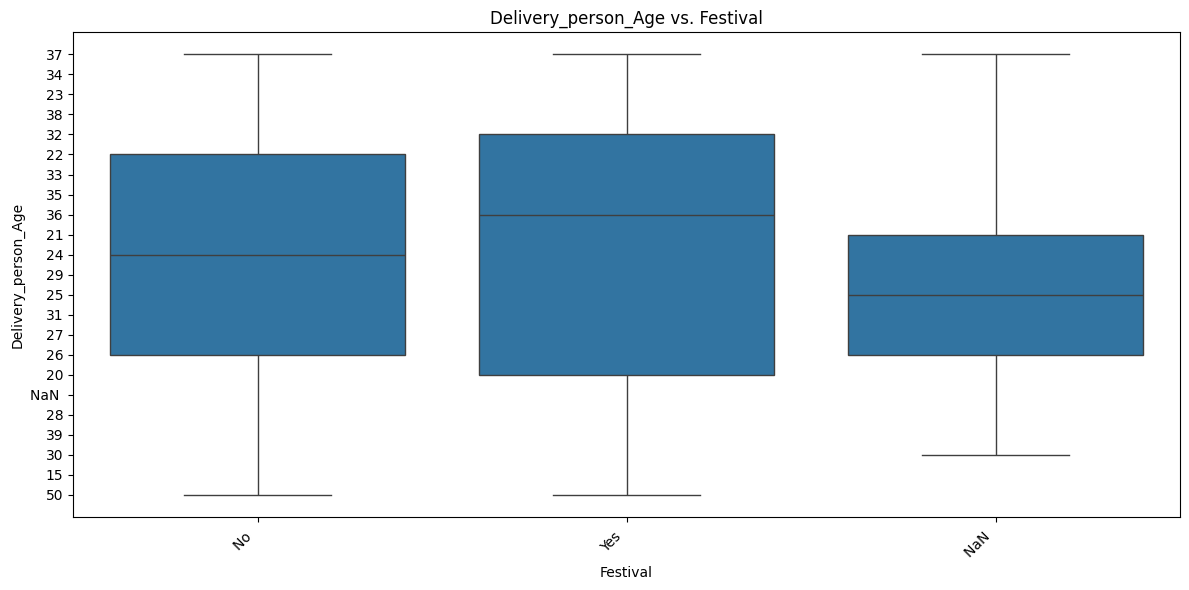

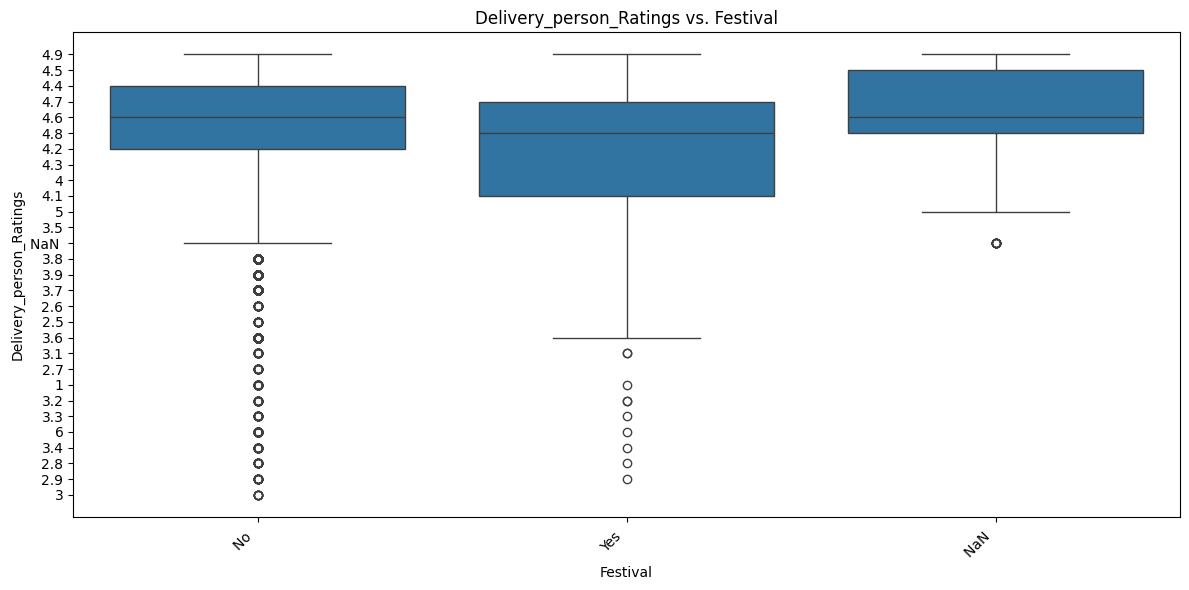

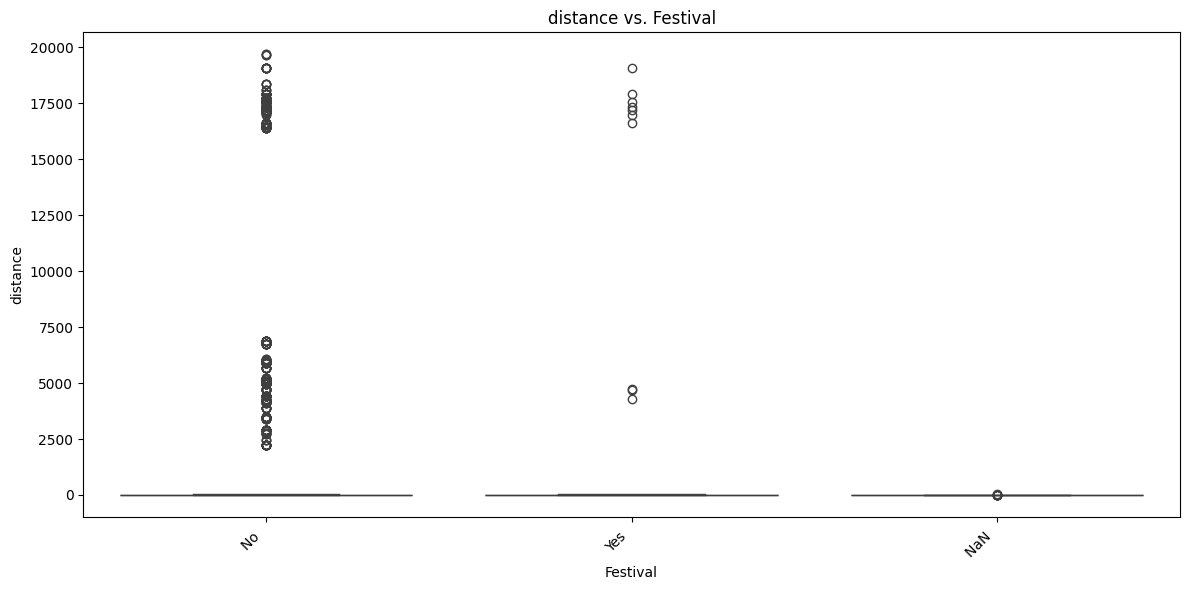

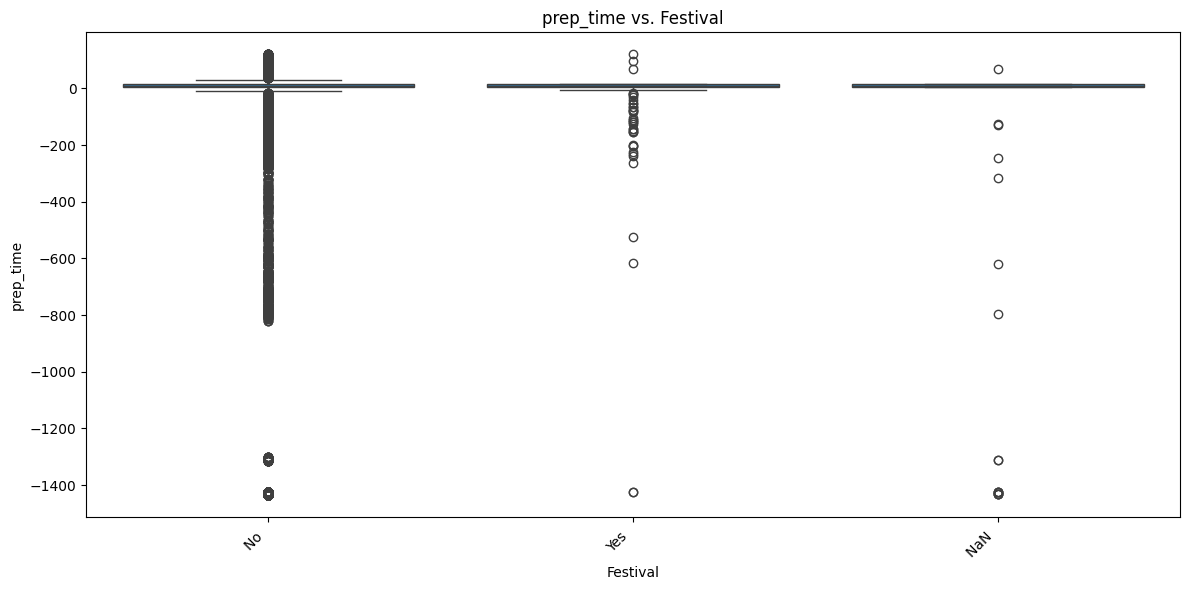

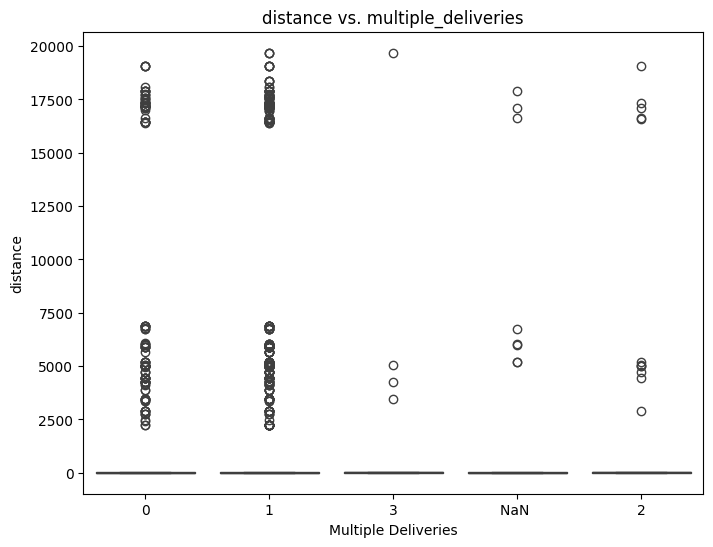

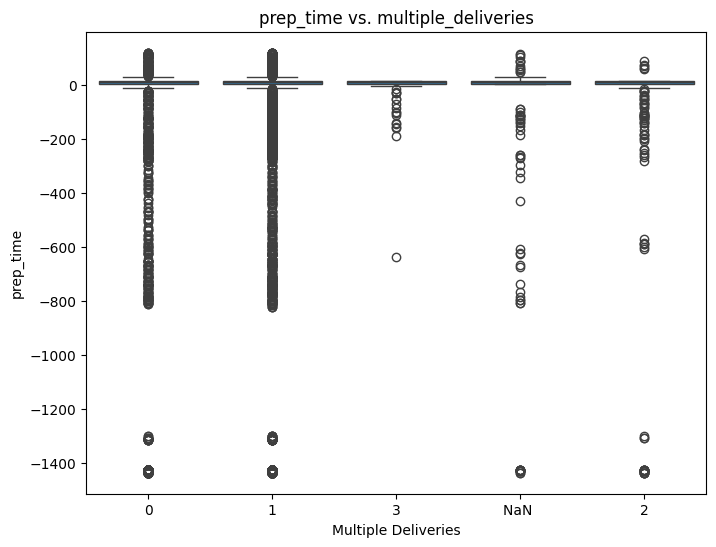

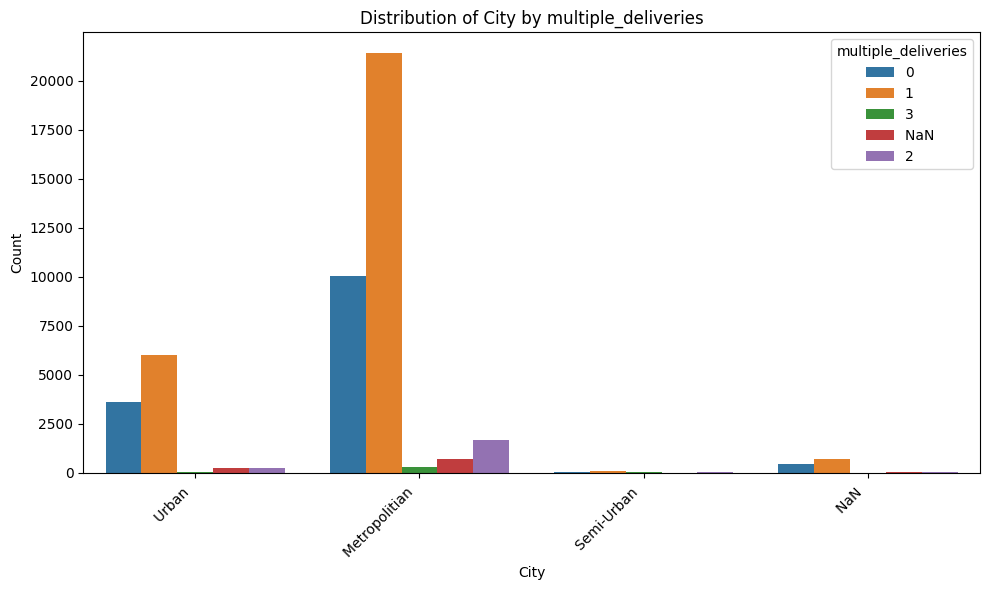

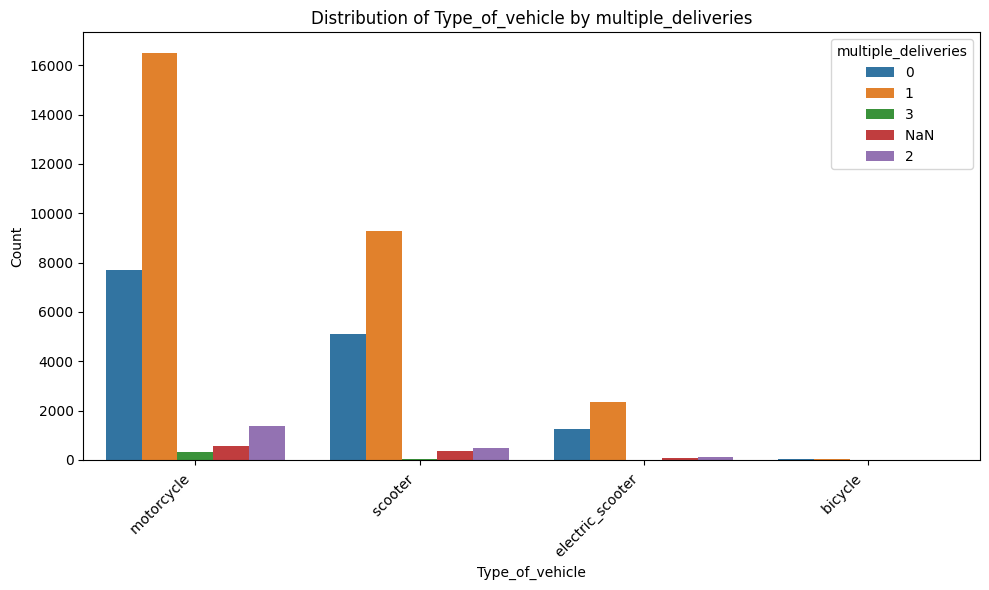


Cross-tabulation of City and multiple_deliveries:


multiple_deliveries      0      1     2    3  NaN 
City                                              
Metropolitian        10026  21395  1683  283   706
NaN                    447    686    29    4    34
Semi-Urban              24     77    22   41     0
Urban                 3598   6001   251   33   253


Cross-tabulation of Type_of_vehicle and multiple_deliveries:


multiple_deliveries     0      1     2    3  NaN 
Type_of_vehicle                                  
bicycle                20     43     4    0     1
electric_scooter     1262   2333   130    8    81
motorcycle           7700  16508  1361  322   544
scooter              5113   9275   490   31   367

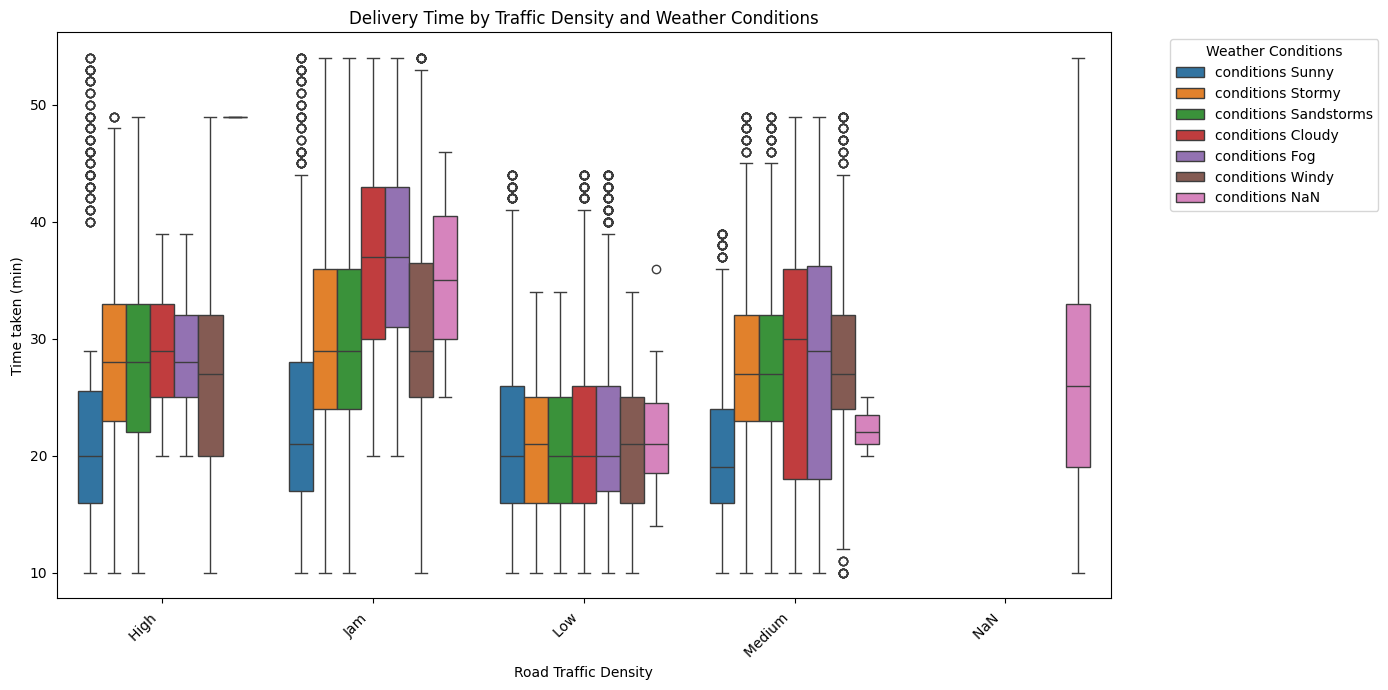


Average Delivery Time by Traffic Density and Weather Conditions:


Weatherconditions     conditions Cloudy  conditions Fog  conditions NaN  \
Road_traffic_density                                                      
High                          28.940860       28.426546       49.000000   
Jam                           36.689655       36.806916       35.333333   
Low                           22.208445       22.303427       22.250000   
Medium                        28.483134       28.044816       22.333333   
NaN                                 NaN             NaN       26.542429   

Weatherconditions     conditions Sandstorms  conditions Stormy  \
Road_traffic_density                                             
High                              27.711840          27.845839   
Jam                               30.018758          29.850194   
Low                               20.297049          20.681734   
Medium                            27.738522          27.680502   
NaN                                     NaN                NaN   

Weatherconditions     conditions Sunny  conditions Windy  
Road_traffic_density                                      
High                         23.448980         26.972789  
Jam                          23.082132         30.219056  
Low                          21.449293         20.665862  
Medium                       20.195518         27.888769  
NaN                                NaN               NaN

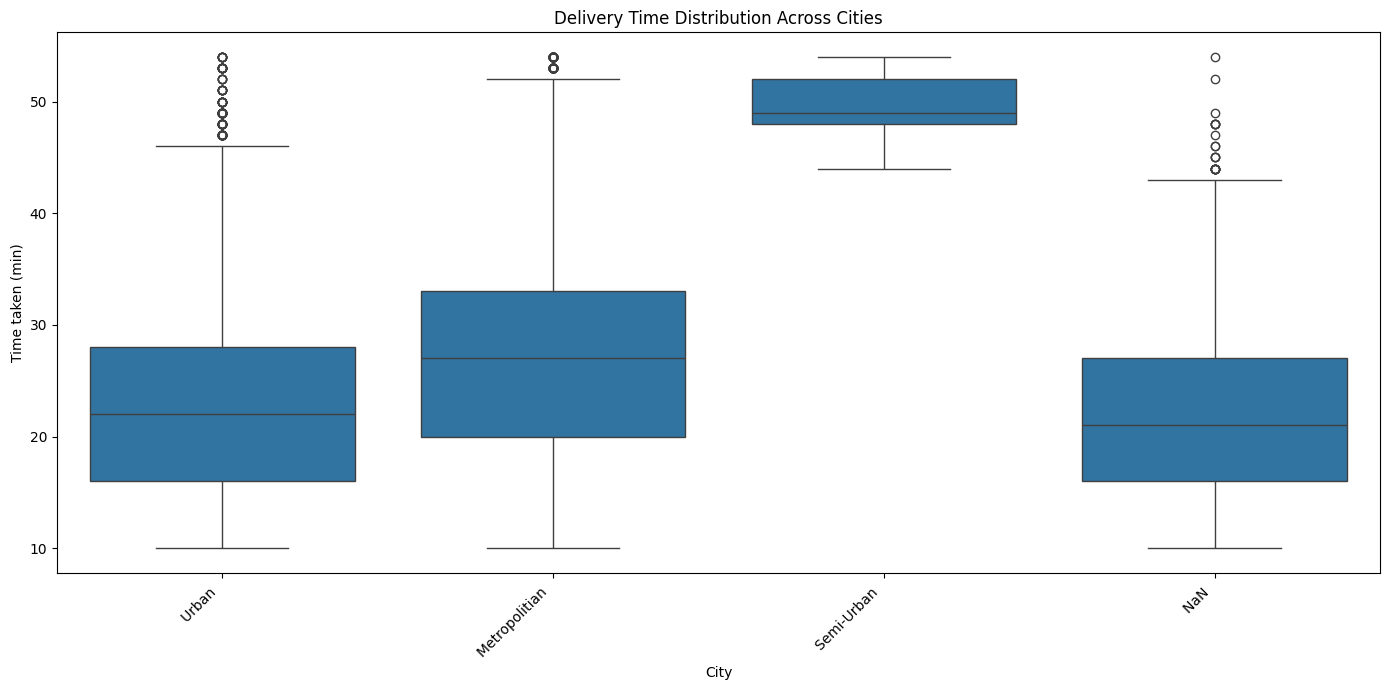

/tmp/ipython-input-2796465890.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_per_city.index, y=avg_time_per_city.values, palette='viridis')


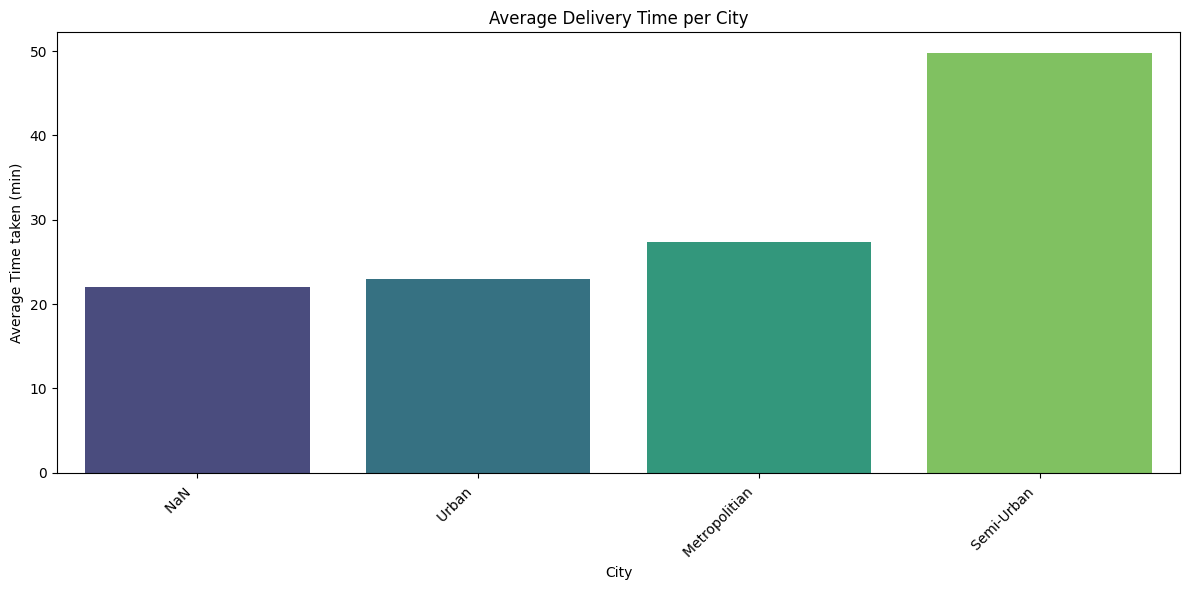

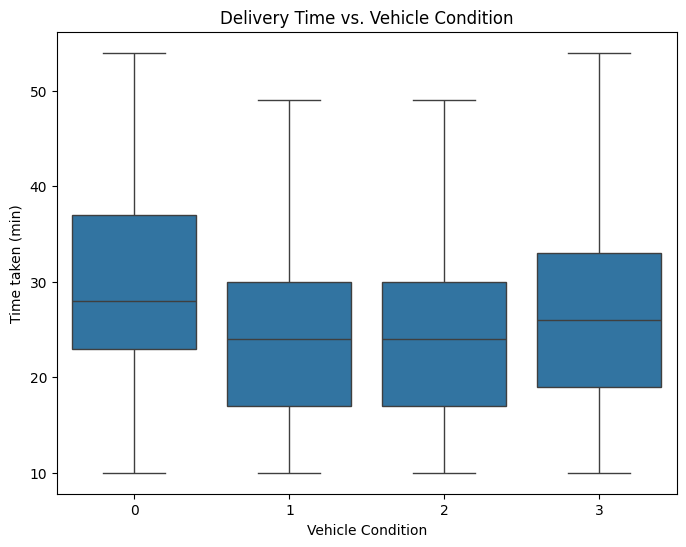


Average Delivery Time by Vehicle Condition:


Vehicle_condition
1    24.355090
2    24.455434
3    26.492308
0    30.072223
Name: Time_taken(min), dtype: float64

In [11]:
# <ANALYSIS_CATEGORICAL_NUMERICAL>
# Analyze relationships between categorical features and numerical features (excluding target)
categorical_features = ['Road_traffic_density', 'Weatherconditions', 'Type_of_order',
                        'Type_of_vehicle', 'time_of_day', 'City', 'Festival']
numerical_features_no_target = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance', 'prep_time']

for cat_feature in categorical_features:
    for num_feature in numerical_features_no_target:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cat_feature, y=num_feature, data=df)
        plt.title(f'{num_feature} vs. {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
# </ANALYSIS_CATEGORICAL_NUMERICAL>

# <ANALYSIS_MULTIPLE_DELIVERIES>
# Analyze the relationship between multiple deliveries and other features
# Numerical features vs multiple_deliveries
numerical_features_multi = ['distance', 'prep_time']
for num_feature in numerical_features_multi:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='multiple_deliveries', y=num_feature, data=df)
    plt.title(f'{num_feature} vs. multiple_deliveries')
    plt.xlabel('Multiple Deliveries')
    plt.ylabel(num_feature)
    plt.show()

# Categorical features vs multiple_deliveries (using count plots for distribution)
categorical_features_multi = ['City', 'Type_of_vehicle']
for cat_feature in categorical_features_multi:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_feature, hue='multiple_deliveries', data=df)
    plt.title(f'Distribution of {cat_feature} by multiple_deliveries')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Cross-tabulation for more precise counts/proportions
for cat_feature in categorical_features_multi:
    print(f"\nCross-tabulation of {cat_feature} and multiple_deliveries:")
    display(pd.crosstab(df[cat_feature], df['multiple_deliveries']))

# </ANALYSIS_MULTIPLE_DELIVERIES>

# <ANALYSIS_WEATHER_TRAFFIC>
# Analyze the impact of weather conditions and traffic density on delivery time more closely
# Grouped box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', hue='Weatherconditions', data=df)
plt.title('Delivery Time by Traffic Density and Weather Conditions')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time taken (min)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Consider mean delivery time for combinations
weather_traffic_time = df.groupby(['Road_traffic_density', 'Weatherconditions'])['Time_taken(min)'].mean().reset_index()
print("\nAverage Delivery Time by Traffic Density and Weather Conditions:")
display(weather_traffic_time.pivot(index='Road_traffic_density', columns='Weatherconditions', values='Time_taken(min)'))

# </ANALYSIS_WEATHER_TRAFFIC>

# <ANALYSIS_CITY_DELIVERY_TIME>
# Explore the distribution of delivery times across different cities
plt.figure(figsize=(14, 7))
sns.boxplot(x='City', y='Time_taken(min)', data=df)
plt.title('Delivery Time Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Time taken (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and visualize average delivery time per city
avg_time_per_city = df.groupby('City')['Time_taken(min)'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_time_per_city.index, y=avg_time_per_city.values, palette='viridis')
plt.title('Average Delivery Time per City')
plt.xlabel('City')
plt.ylabel('Average Time taken (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# </ANALYSIS_CITY_DELIVERY_TIME>

# <ANALYSIS_VEHICLE_CONDITION>
# Analyze the impact of vehicle condition on delivery time
plt.figure(figsize=(8, 6))
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)', data=df)
plt.title('Delivery Time vs. Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Time taken (min)')
plt.show()

# Calculate average delivery time per vehicle condition
avg_time_per_vehicle_condition = df.groupby('Vehicle_condition')['Time_taken(min)'].mean().sort_values()
print("\nAverage Delivery Time by Vehicle Condition:")
display(avg_time_per_vehicle_condition)

# </ANALYSIS_VEHICLE_CONDITION>

In [5]:
# <CLEANING>
# 1. Identify columns with missing values (already done, but showing again for clarity)
print("Missing values before cleaning:")
print(df.isnull().sum())

# 2. Examine data types (already done, but showing again for clarity)
print("\nData types before cleaning:")
print(df.dtypes)

# 3. Address inconsistencies in 'Time_taken(min)' (already done, but repeating in case of re-execution)
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).str.replace('(min) ', '', regex=False)
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')


# 4. Handle missing values
# Impute numerical columns with median
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude ID columns and already processed time columns (temporarily exclude time columns for string conversion)
cols_to_impute_mode = [col for col in categorical_cols if col not in ['ID', 'Delivery_person_ID', 'Time_Orderd', 'Time_Order_picked']]
for col in cols_to_impute_mode:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Handle missing values in time columns by converting to string before imputing mode
for col in ['Time_Orderd', 'Time_Order_picked']:
     df[col] = df[col].astype(str)
     if df[col].isnull().any() or (df[col] == 'nan').any(): # Check for both pandas NaN and string 'nan'
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        df[col] = df[col].replace('nan', mode_val) # Replace string 'nan' with mode


# 5. Convert time-related columns to datetime objects after handling NaNs
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

# Impute any remaining NaNs in time columns after conversion (if any invalid format existed)
for col in ['Time_Orderd', 'Time_Order_picked']:
    if df[col].isnull().any():
        # For time objects, a suitable imputation might be the mode or a specific time
        # Since mode might be tricky with time objects, let's impute with the most frequent time
        mode_time = df[col].dropna().mode()
        if not mode_time.empty:
            df[col].fillna(mode_time[0], inplace=True)
        else:
            # Fallback to a default time like midnight if mode is empty (unlikely but safe)
            df[col].fillna(pd.to_datetime('00:00:00').time(), inplace=True)


print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning and converting time columns:")
print(df.dtypes)

# </CLEANING>

Missing values before cleaning:
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

Data types before cleaning:
ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                    object
Delivery_person_Ratings                object
Restaurant_latitude                   float64
Restaurant_longitude                

/tmp/ipython-input-2990990087.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_time[0], inplace=True)


## Feature engineering

### Subtask:
Create new features from existing columns that could be useful for analysis or modeling. Add tags for this section.


**Reasoning**:
Calculate new features based on the provided instructions.



In [6]:
# <FEATURE_ENGINEERING>

# 1. Calculate the distance between the restaurant and the delivery location
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

df['distance'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                               row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

# 2. Extract hour and minute from time columns
df['Order_hour'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S').dt.hour
df['Order_minute'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S').dt.minute
df['Picked_hour'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S').dt.hour
df['Picked_minute'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S').dt.minute


# 3. Calculate time difference between Time_Orderd and Time_Order_picked in minutes
# Convert time objects to datetime objects with a dummy date for timediff calculation
df['Order_datetime'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Time_Orderd'].astype(str))
df['Picked_datetime'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Time_Order_picked'].astype(str))

# Handle cases where Picked_datetime might be on the next day if pickup is after midnight
df['prep_time'] = (df['Picked_datetime'] - df['Order_datetime']).dt.total_seconds() / 60

# Drop the temporary datetime columns
df = df.drop(columns=['Order_datetime', 'Picked_datetime'])


# 4. Extract day of the week and month from Order_Date
df['Order_day_of_week'] = df['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Order_month'] = df['Order_Date'].dt.month

# 5. Create time of day feature
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['Order_hour'].apply(get_time_of_day)

# Display the new columns and their data types
print(df[['distance', 'Order_hour', 'Order_minute', 'Picked_hour', 'Picked_minute', 'prep_time', 'Order_day_of_week', 'Order_month', 'time_of_day']].head())
print(df[['distance', 'Order_hour', 'Order_minute', 'Picked_hour', 'Picked_minute', 'prep_time', 'Order_day_of_week', 'Order_month', 'time_of_day']].dtypes)

# </FEATURE_ENGINEERING>

    distance  Order_hour  Order_minute  Picked_hour  Picked_minute  prep_time  \
0   3.025149          11            30           11             45       15.0   
1  20.183530          19            45           19             50        5.0   
2   1.552758           8            30            8             45       15.0   
3   7.790401          18             0           18             10       10.0   
4   6.210138          13            30           13             45       15.0   

   Order_day_of_week  Order_month time_of_day  
0                  5            3     Morning  
1                  4            3     Evening  
2                  5            3     Morning  
3                  1            4     Evening  
4                  5            3   Afternoon  
distance             float64
Order_hour             int32
Order_minute           int32
Picked_hour            int32
Picked_minute          int32
prep_time            float64
Order_day_of_week      int32
Order_month           

## Exploratory data analysis (eda)

### Subtask:
Analyze the data to understand its characteristics, identify patterns, and visualize relationships between variables. Add tags for each analysis step.


**Reasoning**:
Analyze the distribution of the target variable, calculate and visualize the correlation matrix, and visualize the relationship between categorical features and the target variable using box plots. These steps cover parts 1, 2 and 3 of the subtask.



**Reasoning**:
Correct the syntax error in the previous code block and re-run the analysis and visualization steps.



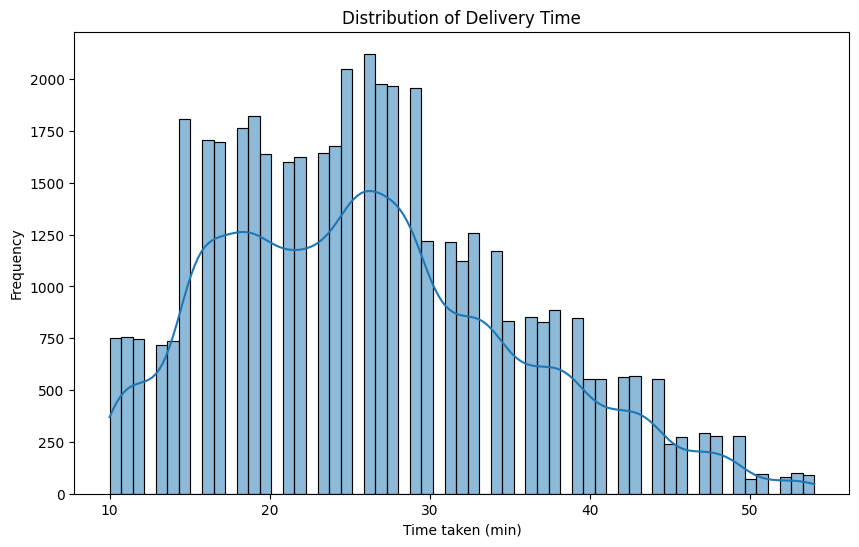


Descriptive statistics for Time_taken(min):
count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64


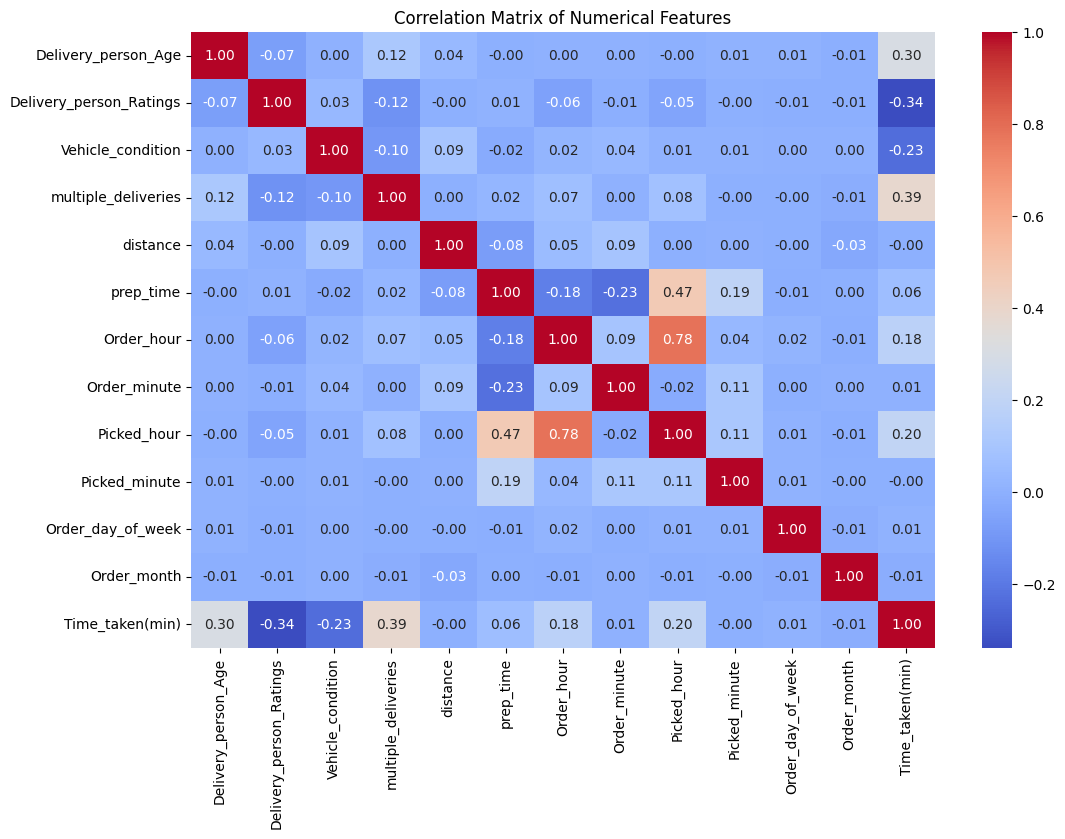

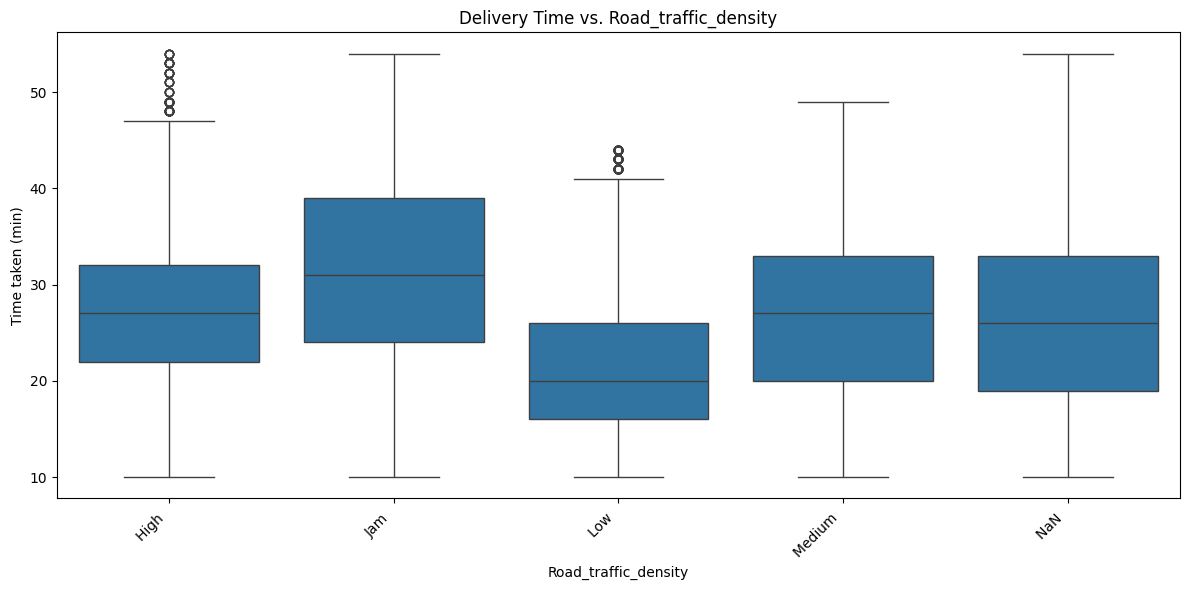

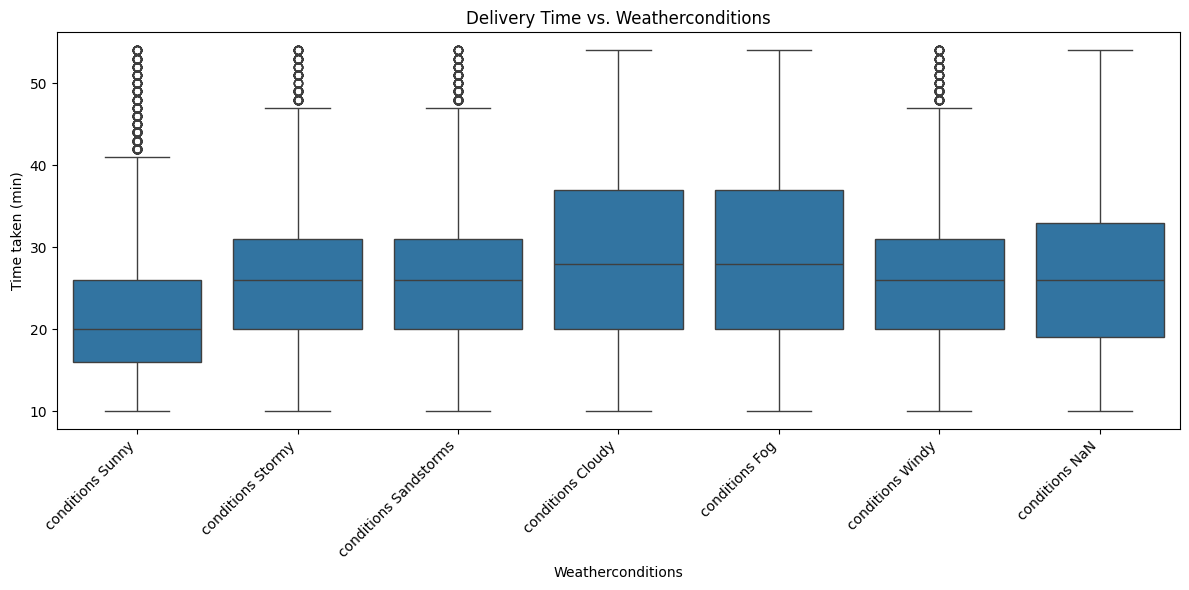

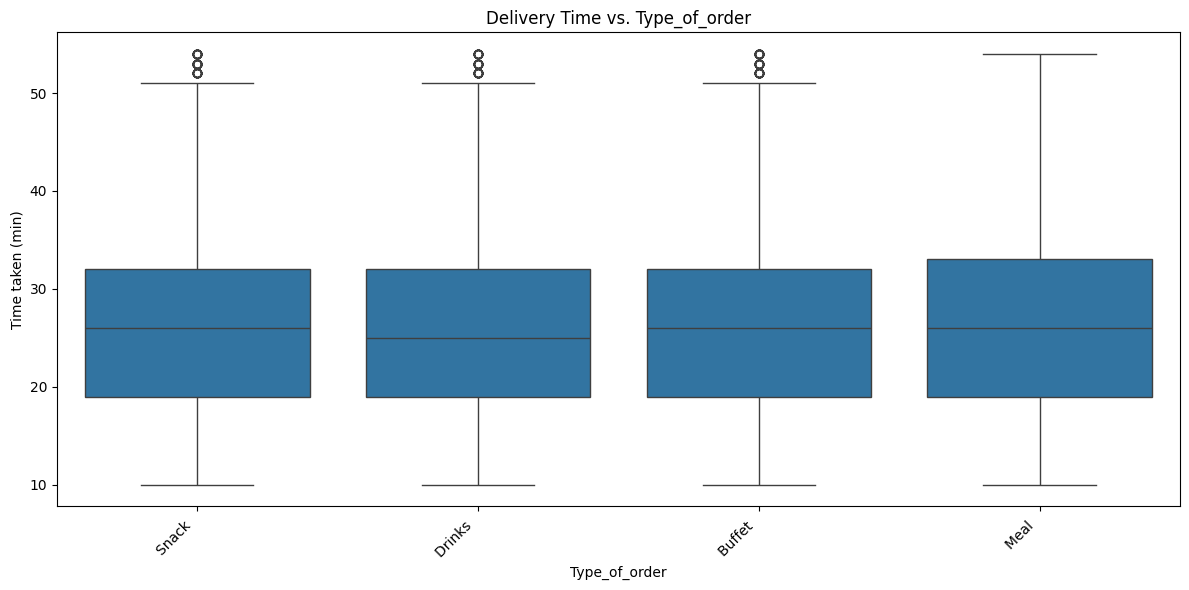

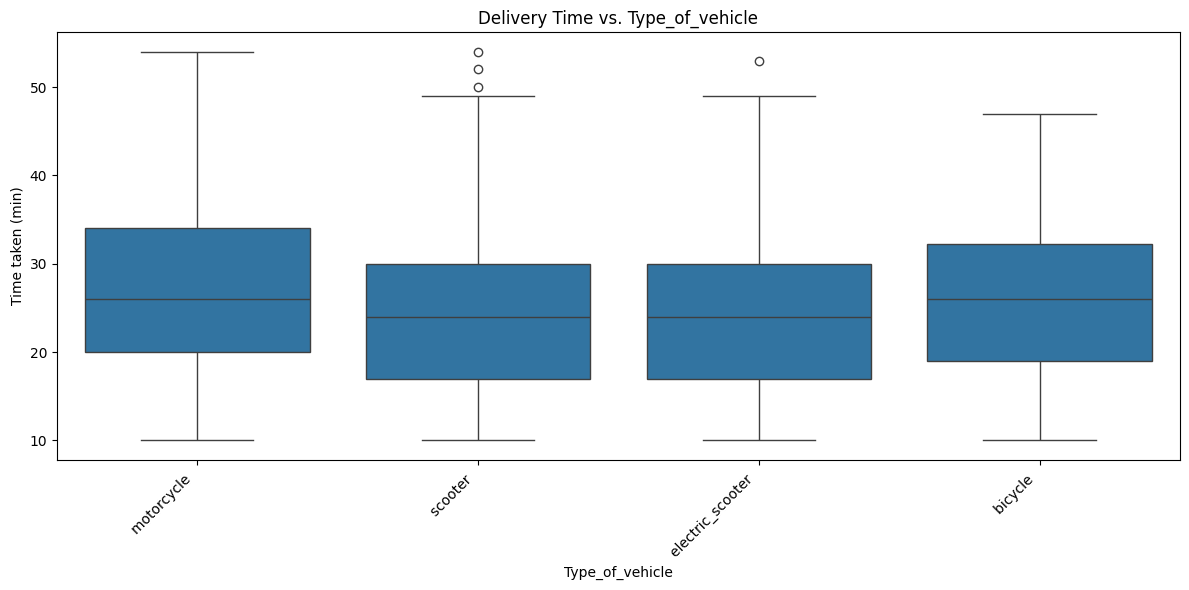

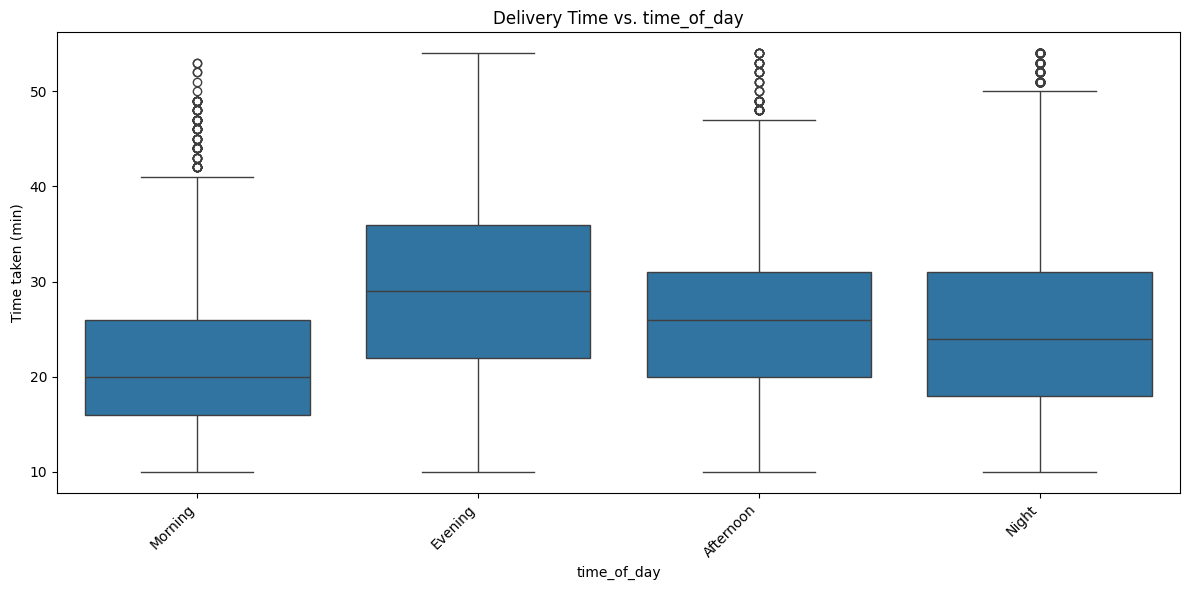

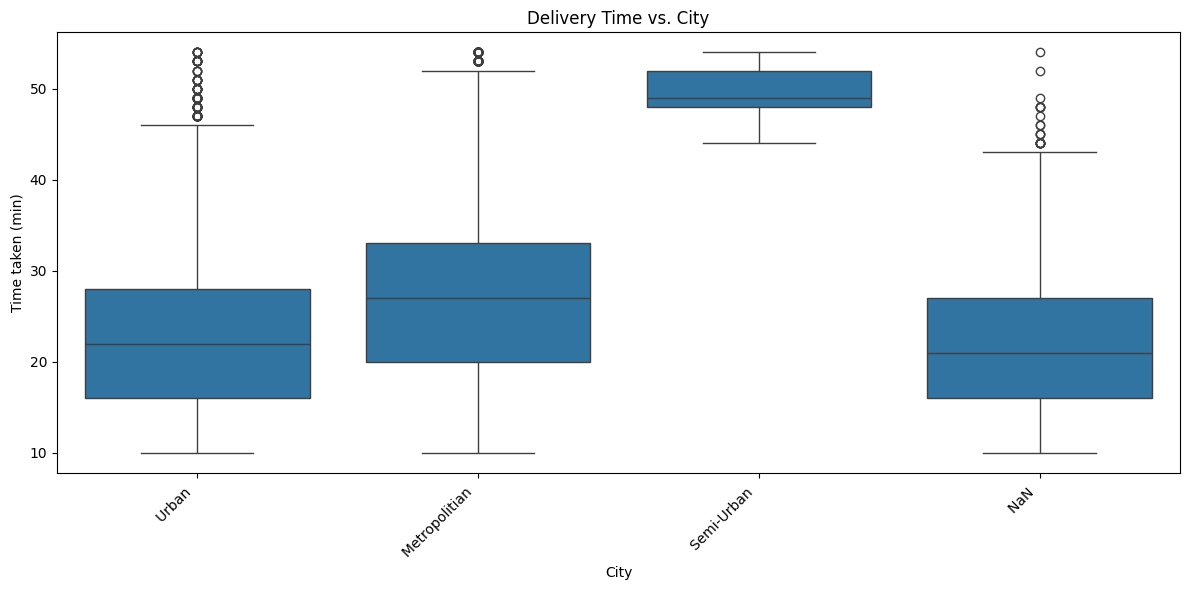

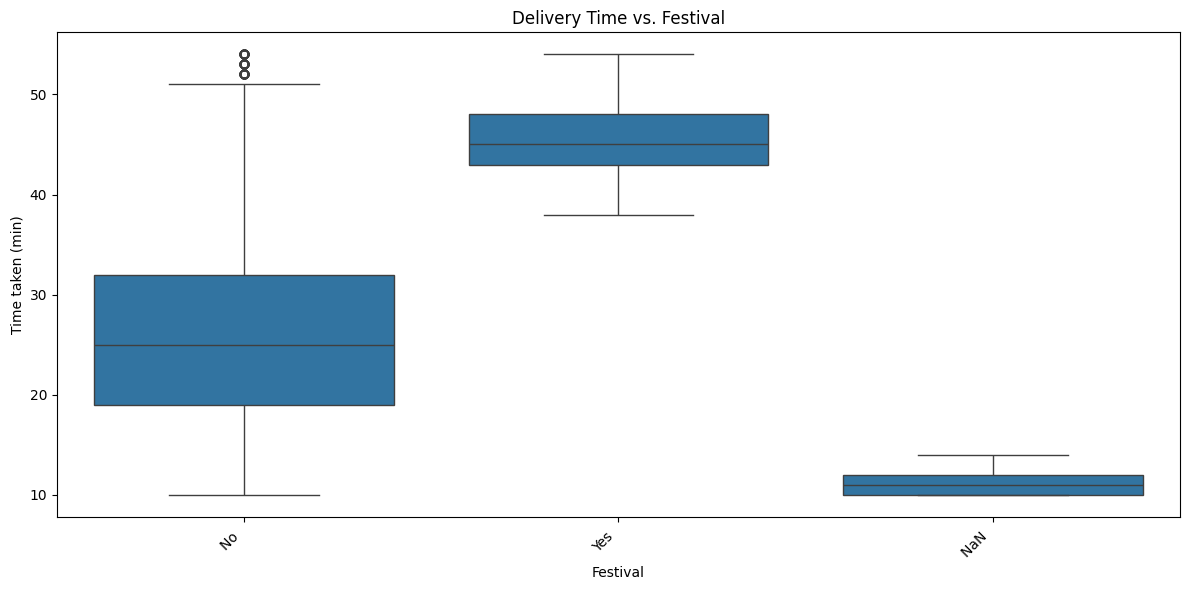

In [8]:
# <EDA_TARGET_VARIABLE>
# 1. Analyze the distribution of the target variable 'Time_taken(min)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken(min)'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Time taken (min)')
plt.ylabel('Frequency')
plt.show()

print("\nDescriptive statistics for Time_taken(min):")
print(df['Time_taken(min)'].describe())
# </EDA_TARGET_VARIABLE>


# <EDA_CORRELATION>
# 2. Calculate and visualize the correlation matrix for numerical features
# Select numerical columns including the newly engineered features
numerical_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
                      'multiple_deliveries', 'distance', 'prep_time', 'Order_hour',
                      'Order_minute', 'Picked_hour', 'Picked_minute', 'Order_day_of_week',
                      'Order_month', 'Time_taken(min)']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# </EDA_CORRELATION>


# <EDA_CATEGORICAL_VS_TARGET>
# 3. Use box plots to visualize the relationship between key categorical features and the target variable
categorical_features = ['Road_traffic_density', 'Weatherconditions', 'Type_of_order',
                        'Type_of_vehicle', 'time_of_day', 'City', 'Festival']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Time_taken(min)', data=df)
    plt.title(f'Delivery Time vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Time taken (min)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
# </EDA_CATEGORICAL_VS_TARGET>

**Reasoning**:
Visualize the distribution of the engineered 'distance' feature and analyze time trends by plotting 'Time_taken(min)' against time-related features. These steps cover parts 4 and 5 of the subtask.



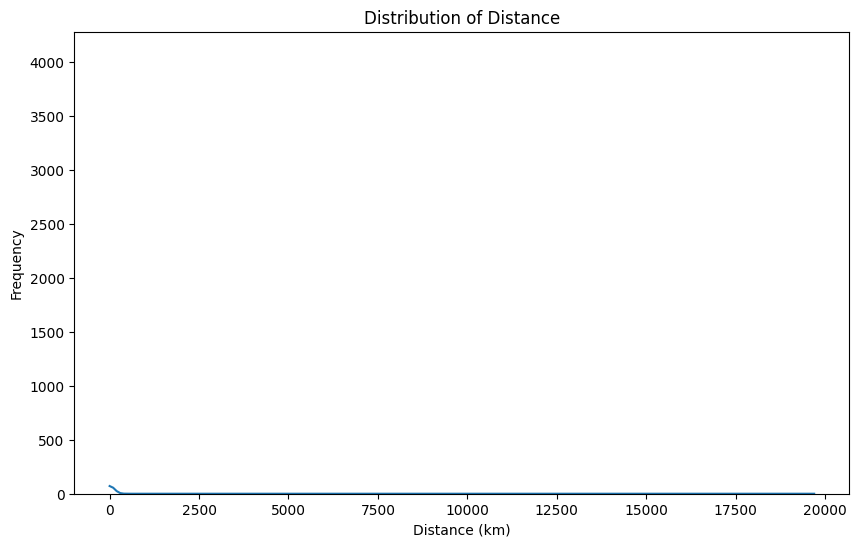

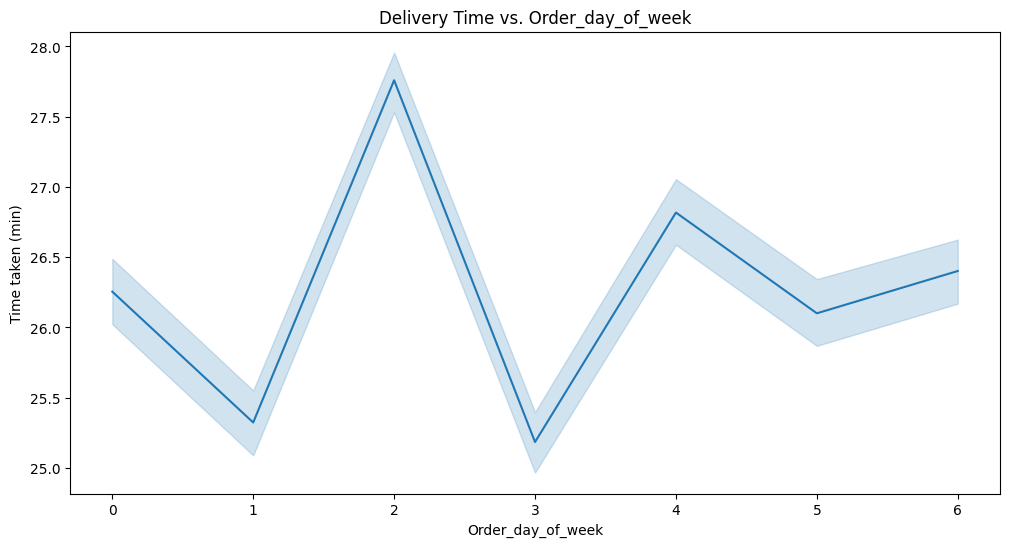

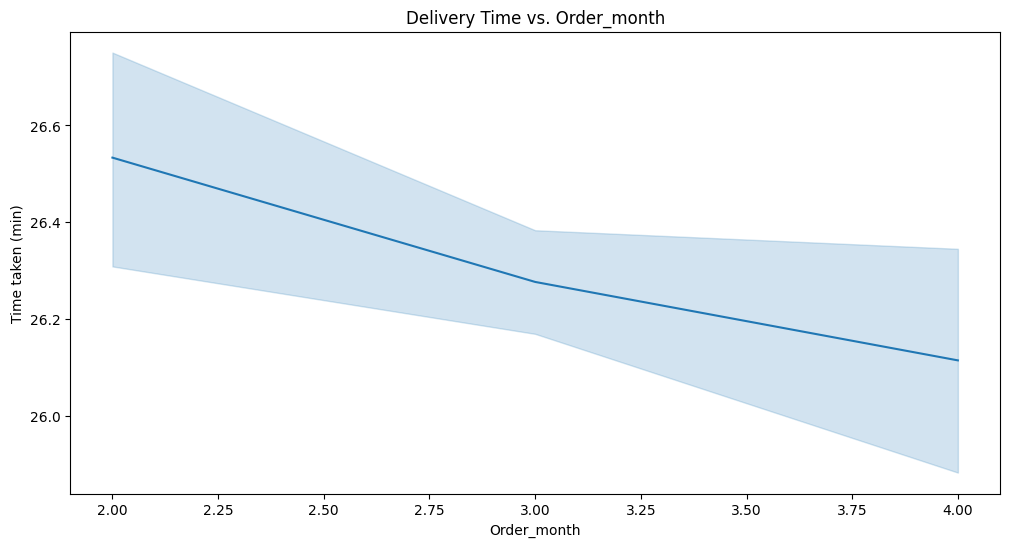

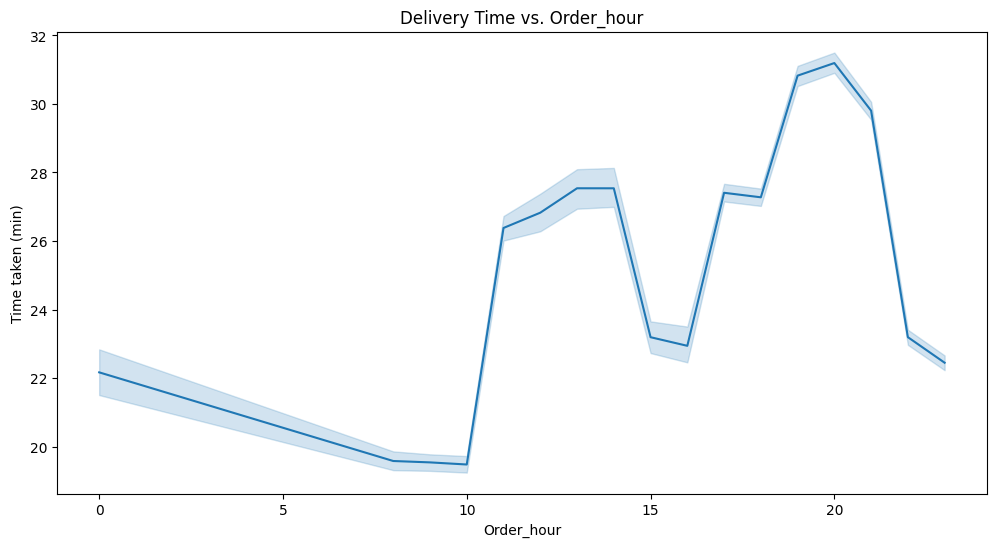

In [9]:
# <EDA_GEOSPATIAL>
# 4. Visualize the distribution of 'distance'
plt.figure(figsize=(10, 6))
sns.histplot(df['distance'], kde=True)
plt.title('Distribution of Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()
# </EDA_GEOSPATIAL>

# <EDA_TIME_TRENDS>
# 5. Analyze how 'Time_taken(min)' varies with time-related features
time_features = ['Order_day_of_week', 'Order_month', 'Order_hour']

for feature in time_features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=feature, y='Time_taken(min)', data=df)
    plt.title(f'Delivery Time vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Time taken (min)')
    plt.show()
# </EDA_TIME_TRENDS>

## Data analysis

### Subtask:
Perform further analysis to extract insights or prepare the data for modeling. Add tags to organize this section.


**Reasoning**:
Analyze the relationships between categorical and numerical features (excluding the target), the relationship between multiple deliveries and other features, the combined impact of weather and traffic on delivery time, the distribution of delivery times across cities, and the impact of vehicle condition on delivery time, adding appropriate tags.



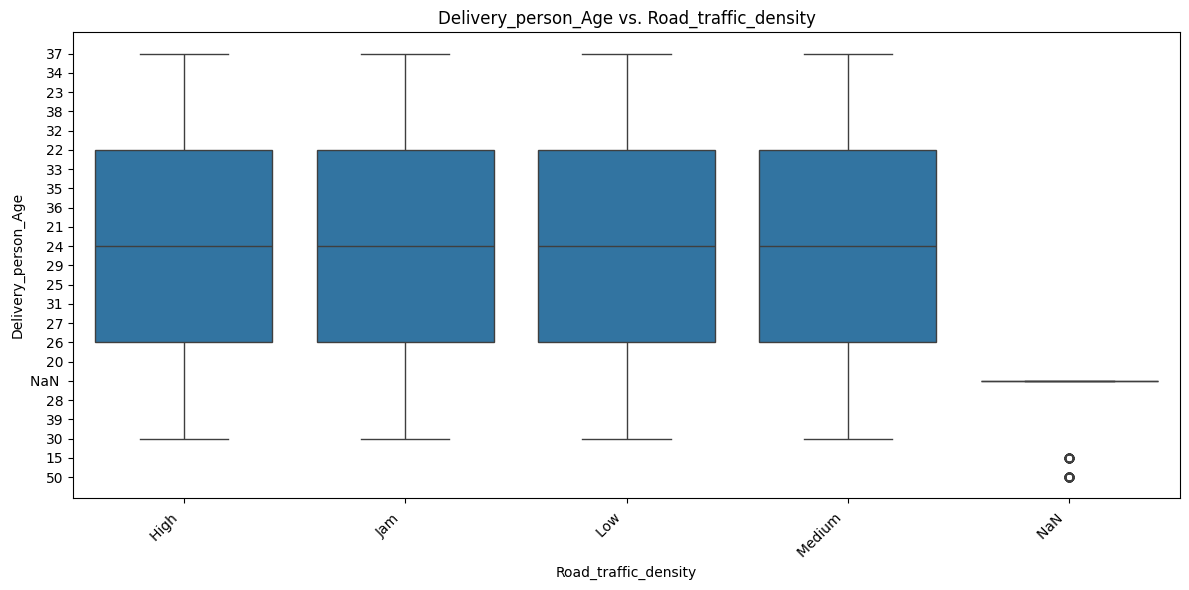

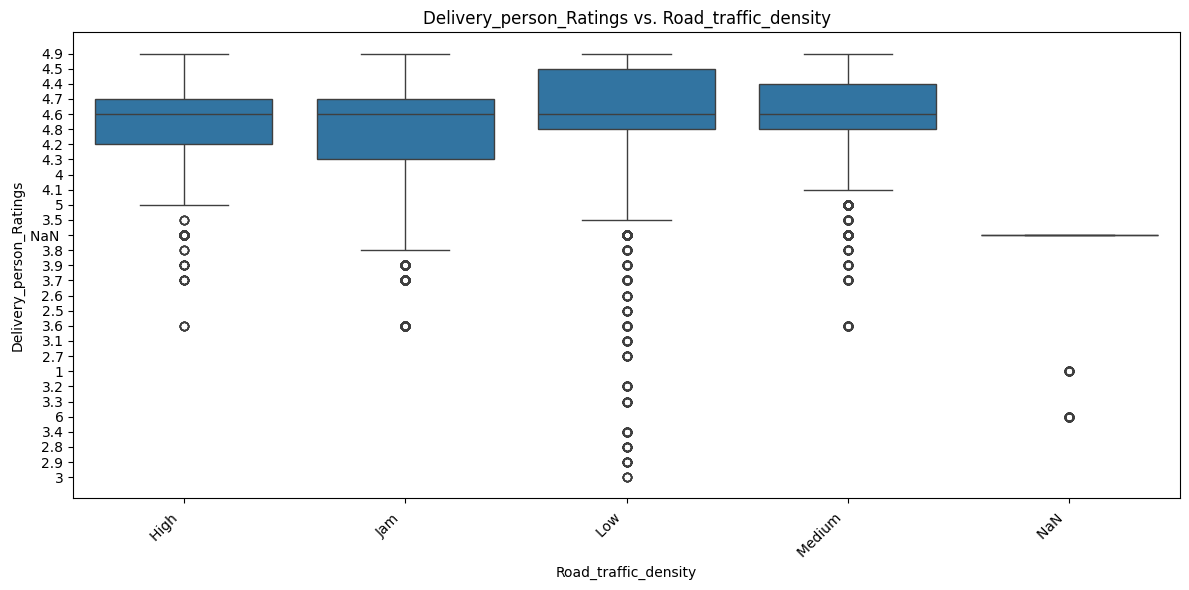

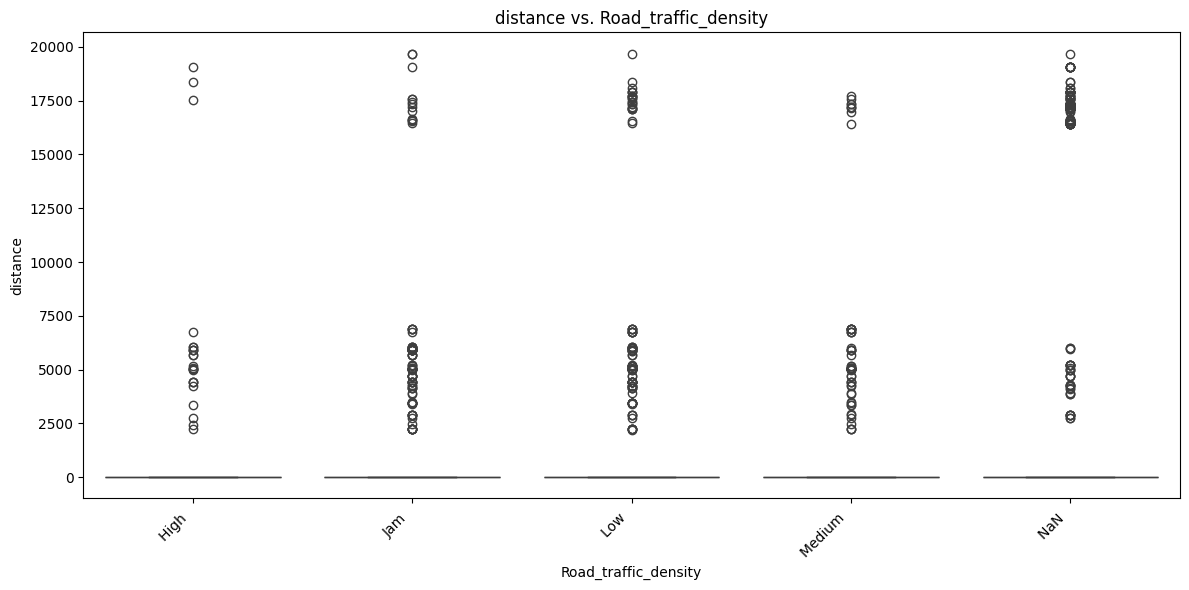

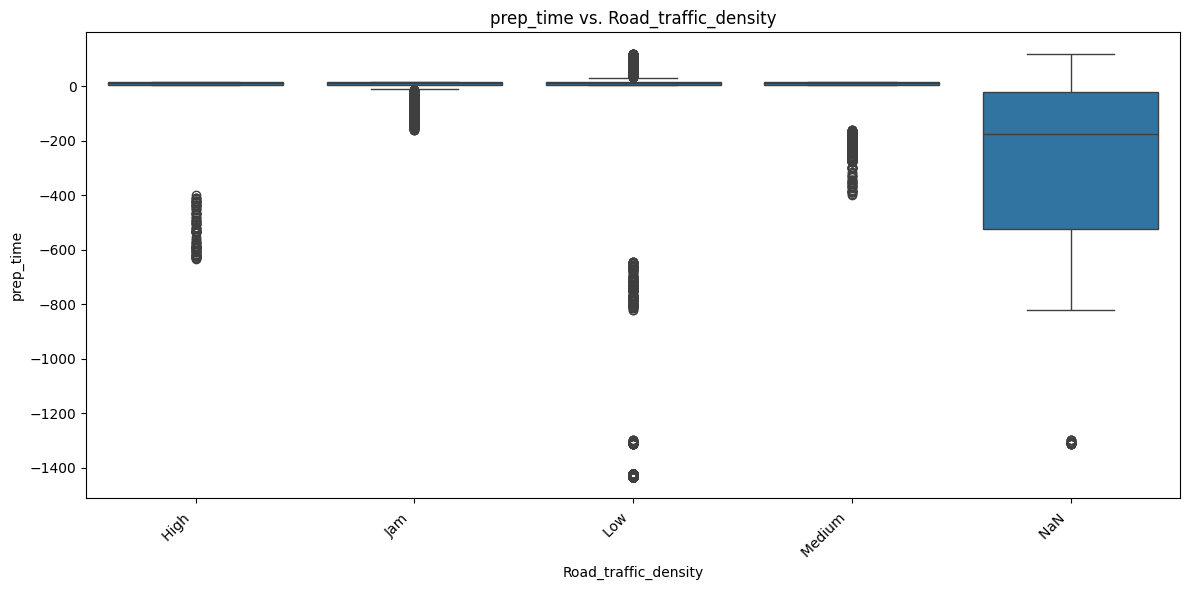

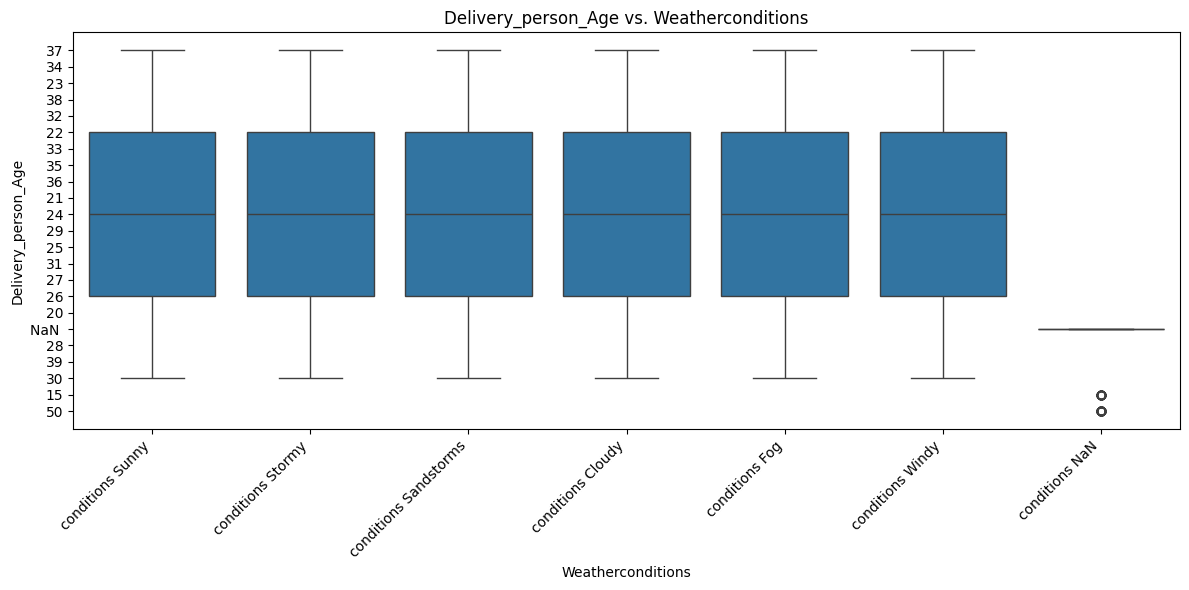

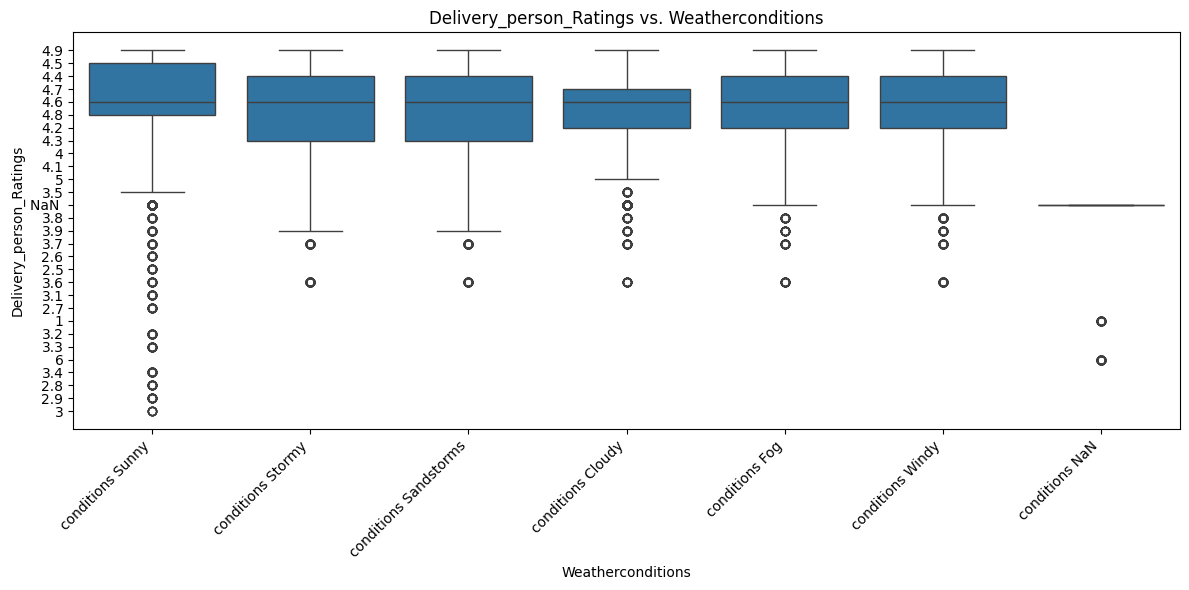

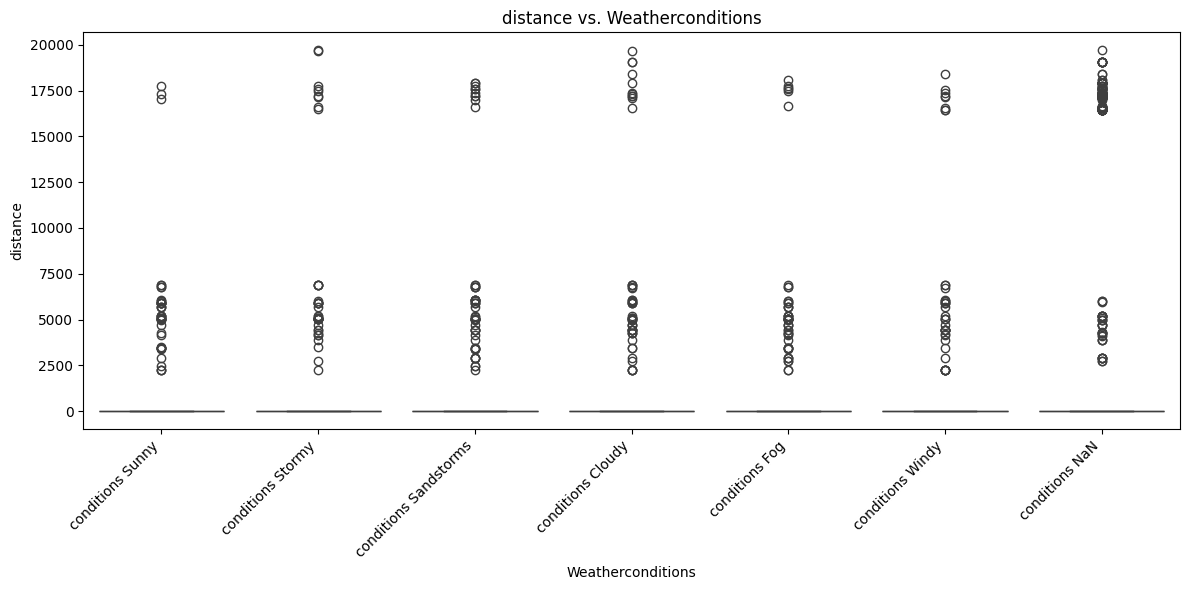

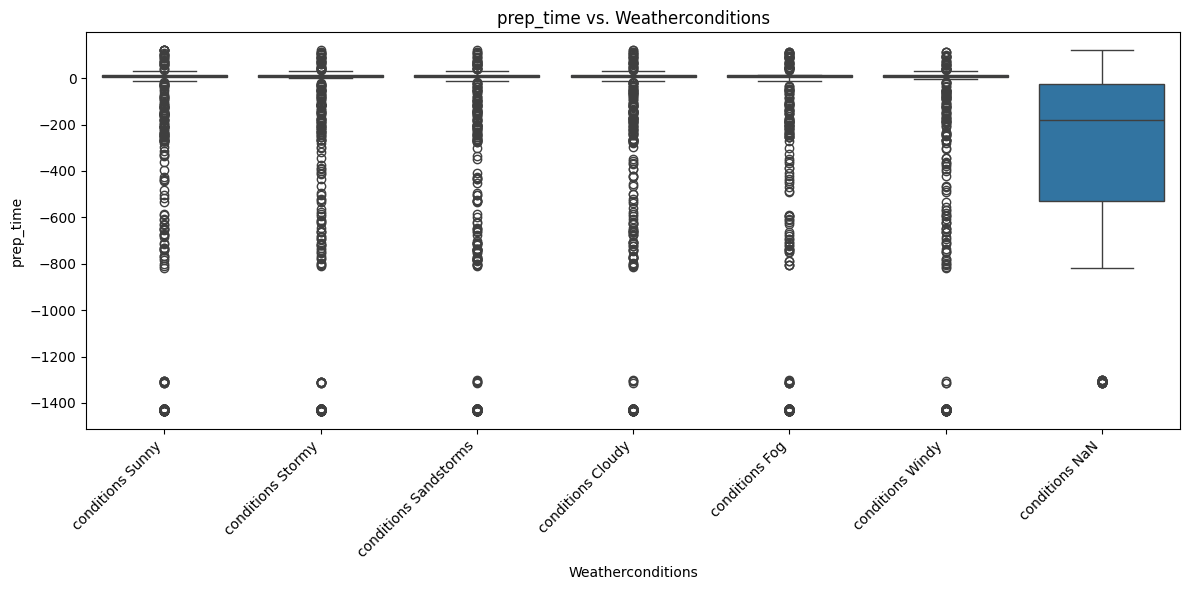

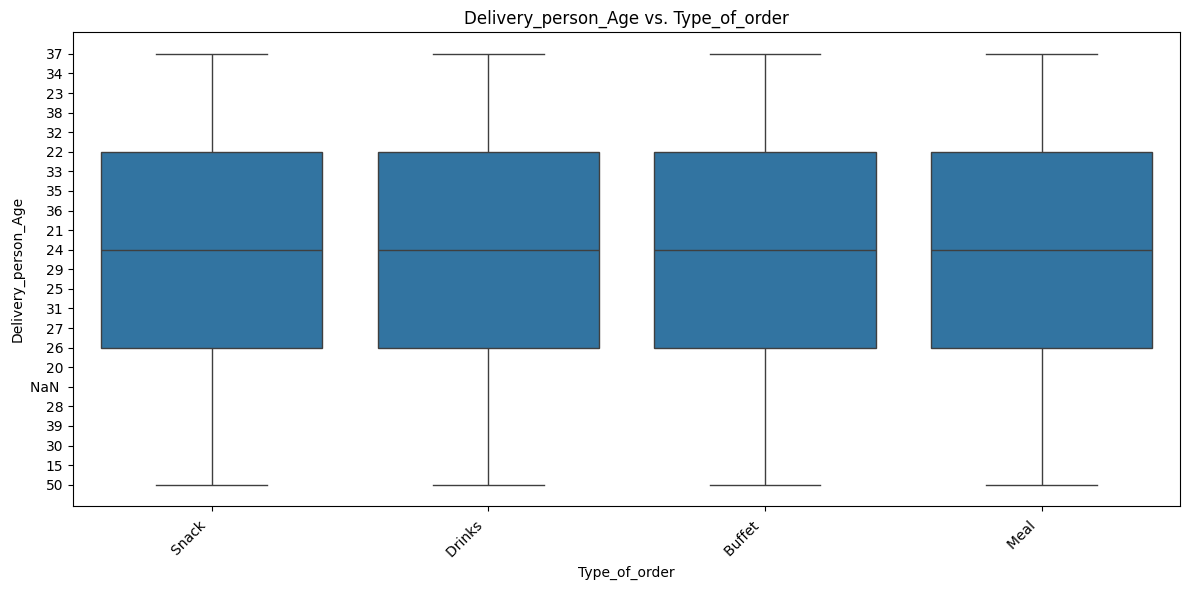

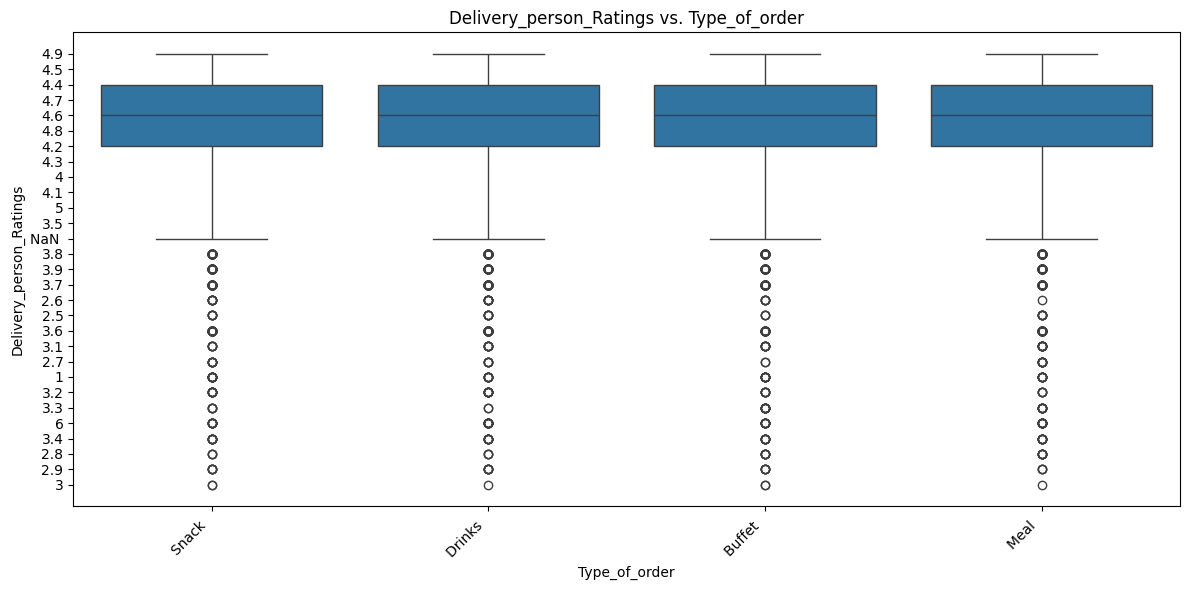

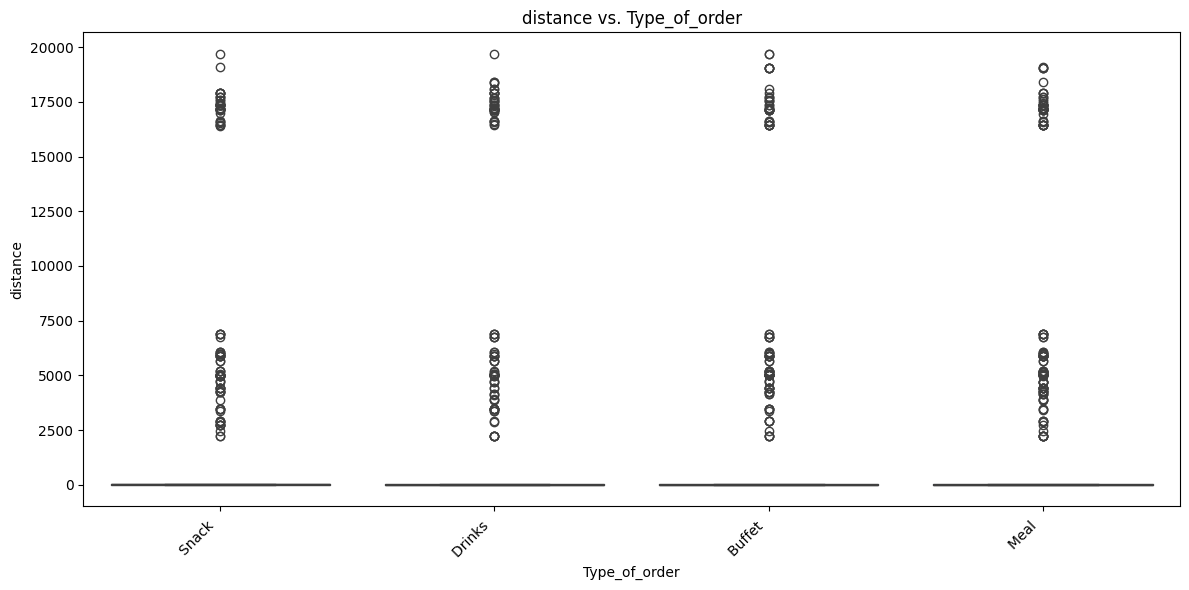

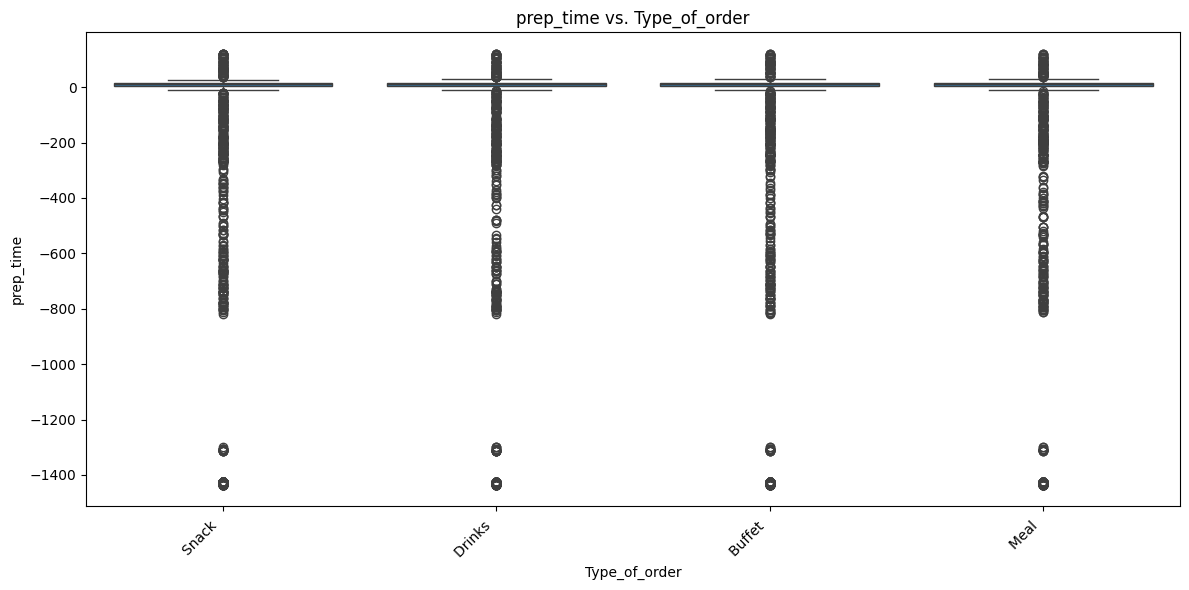

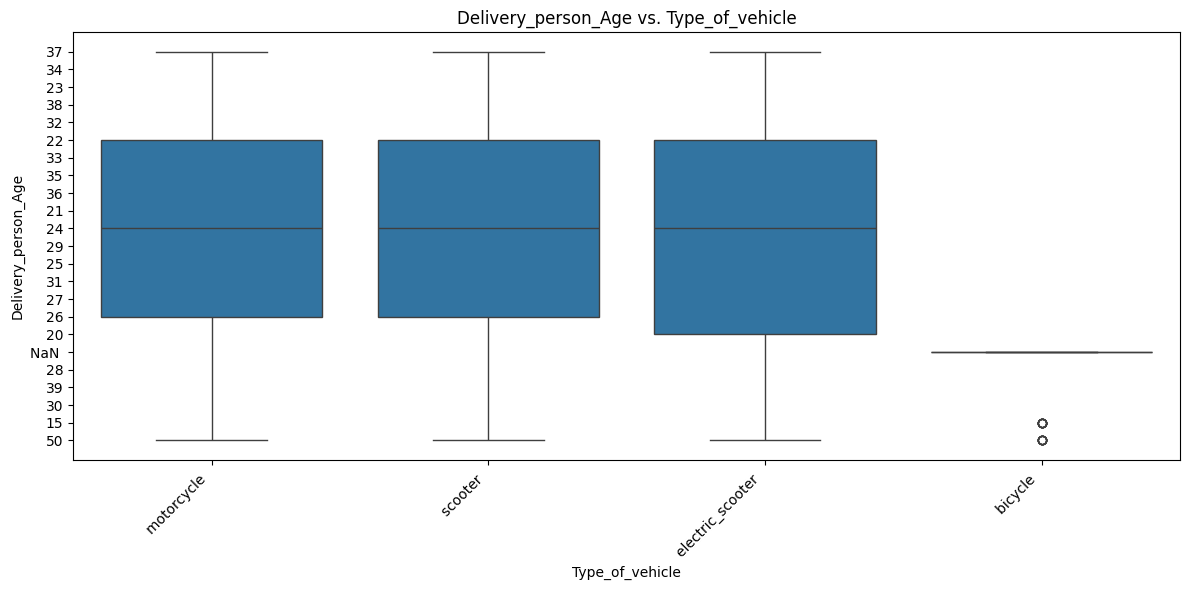

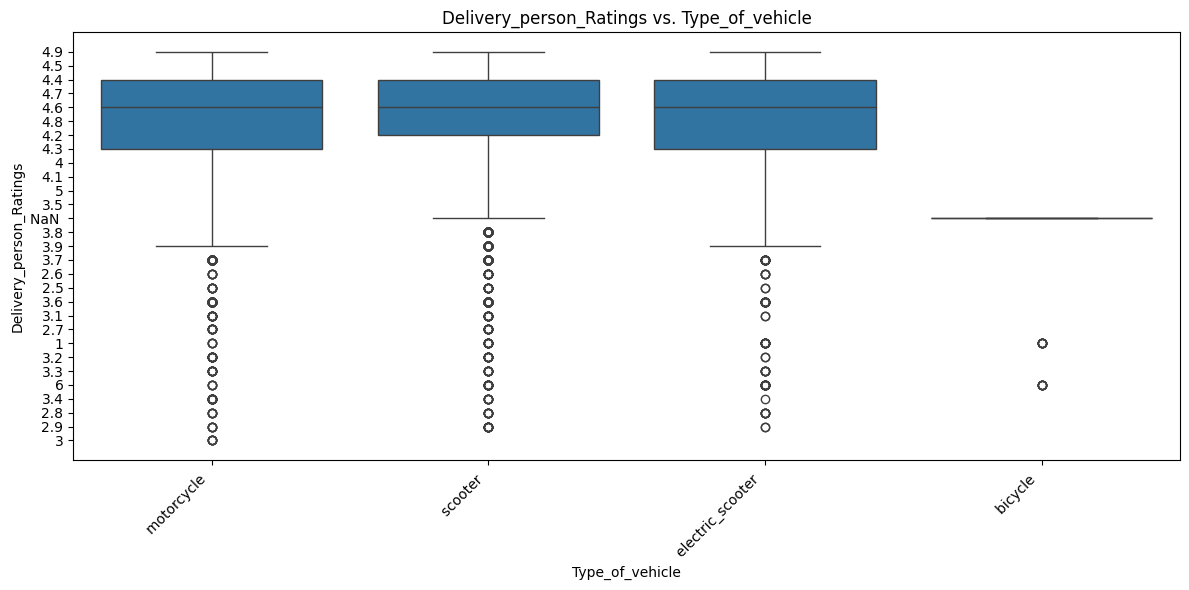

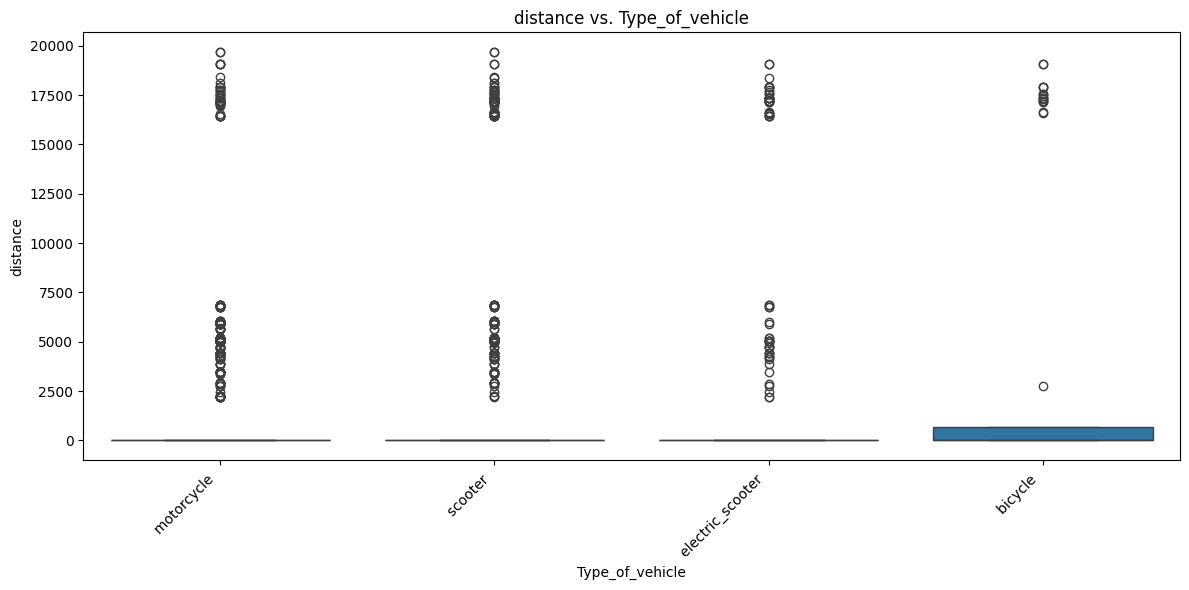

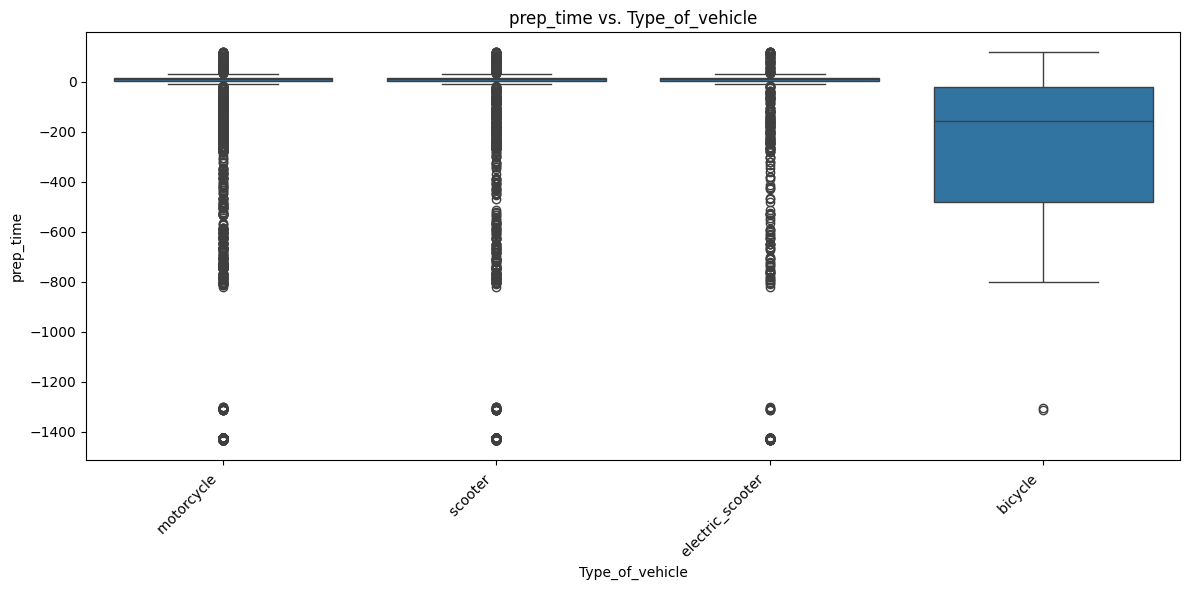

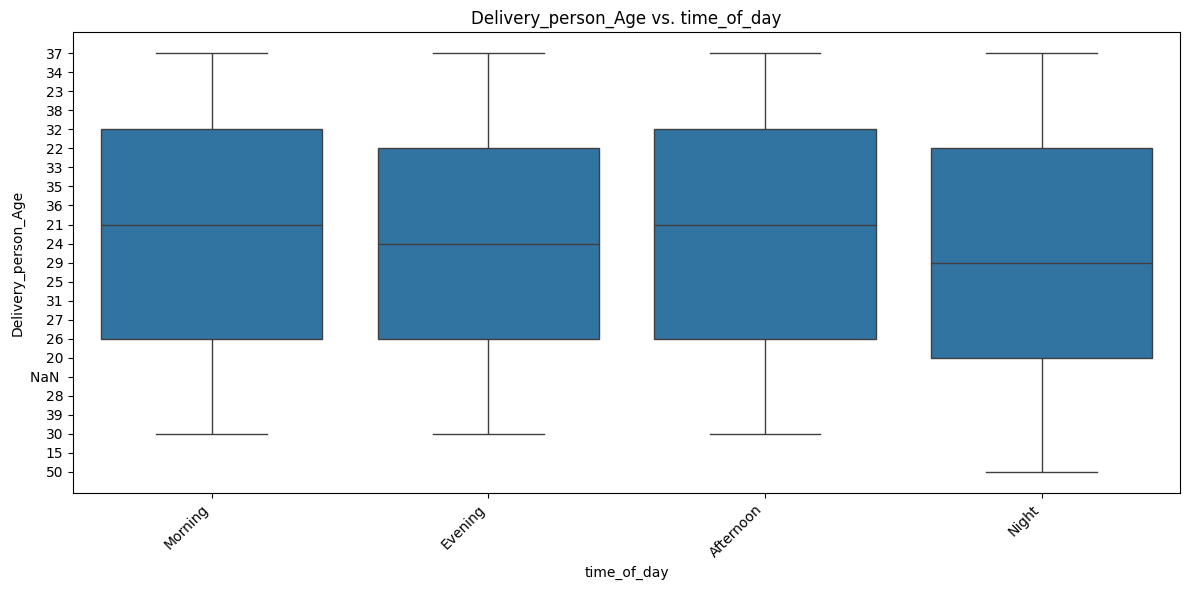

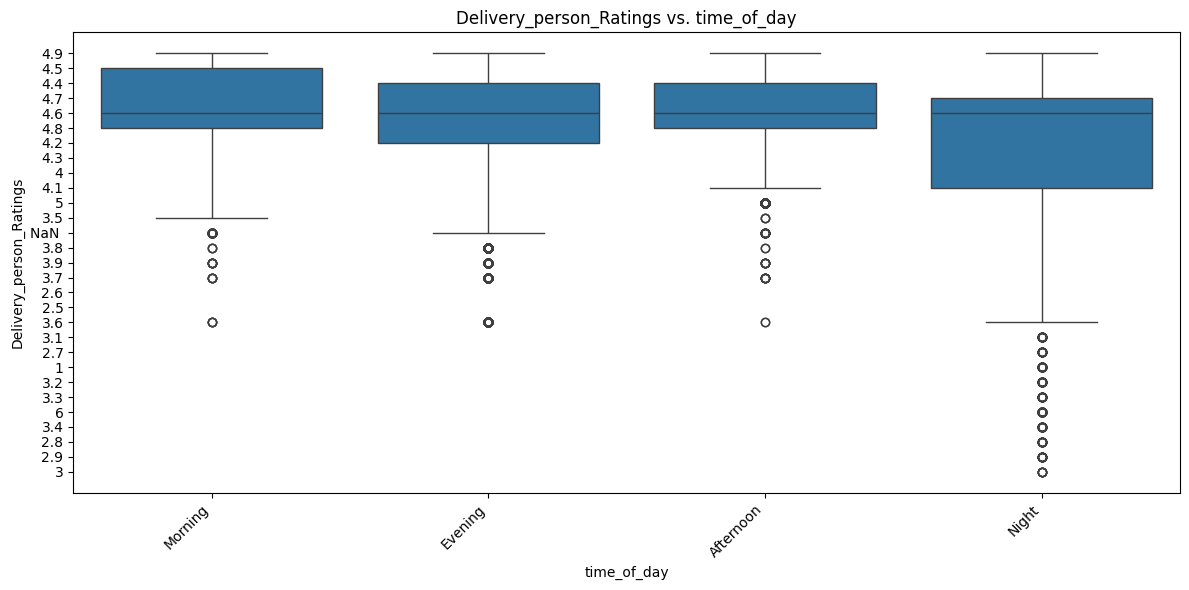

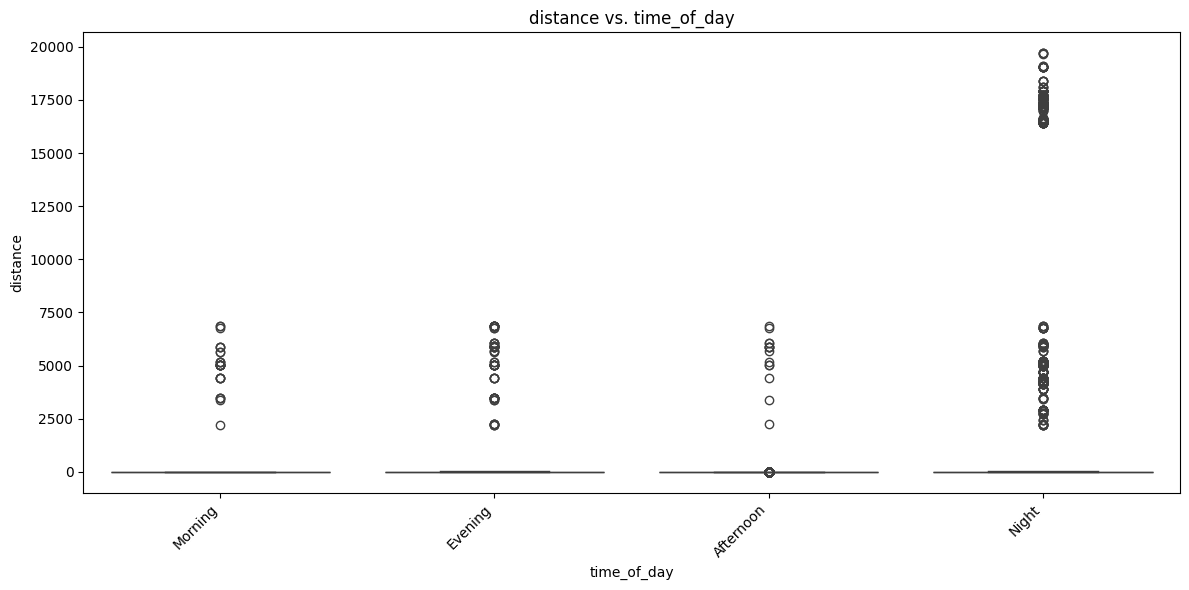

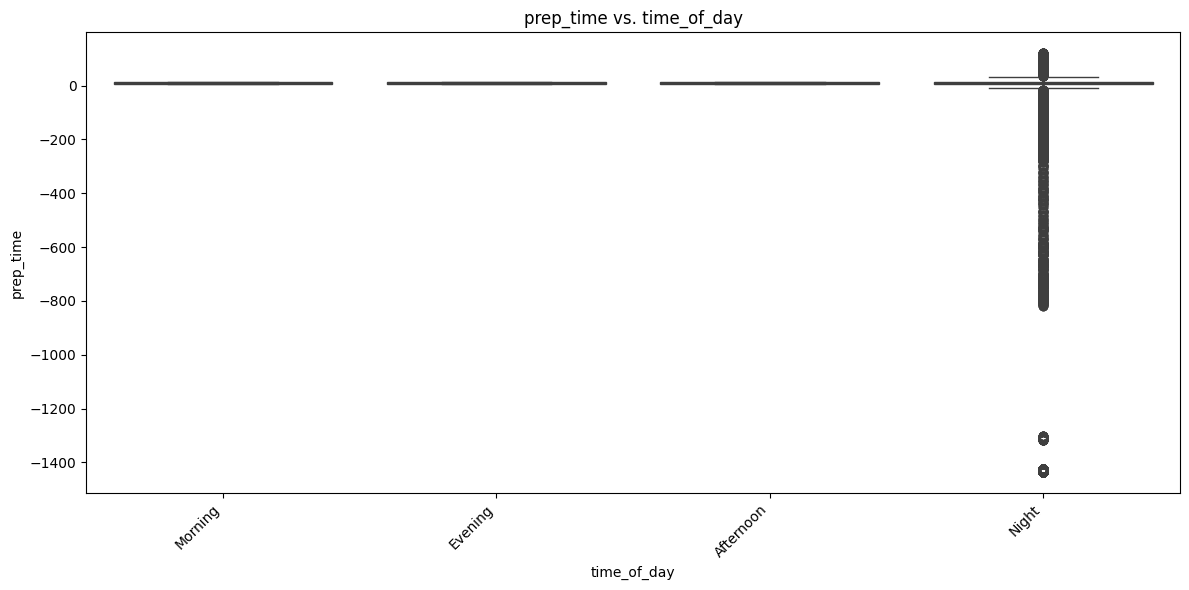

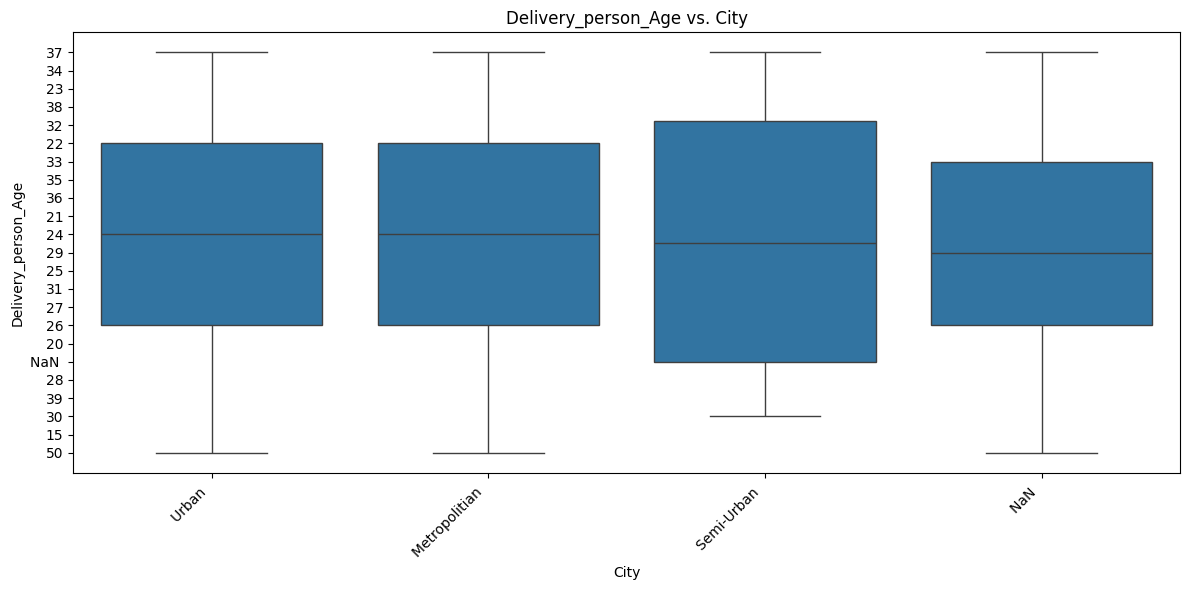

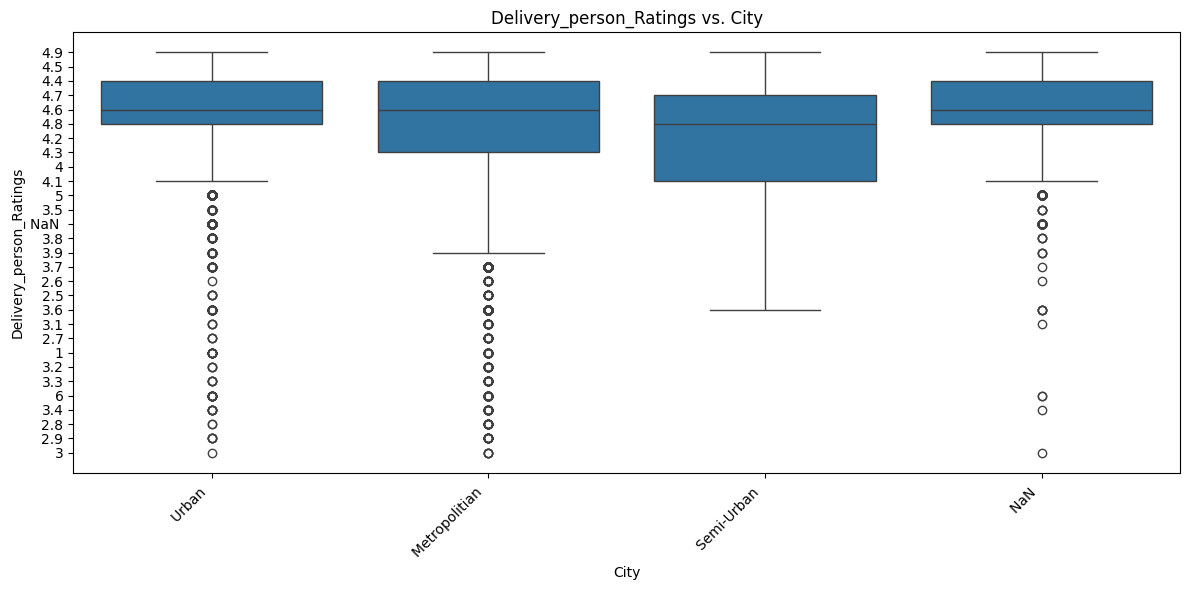

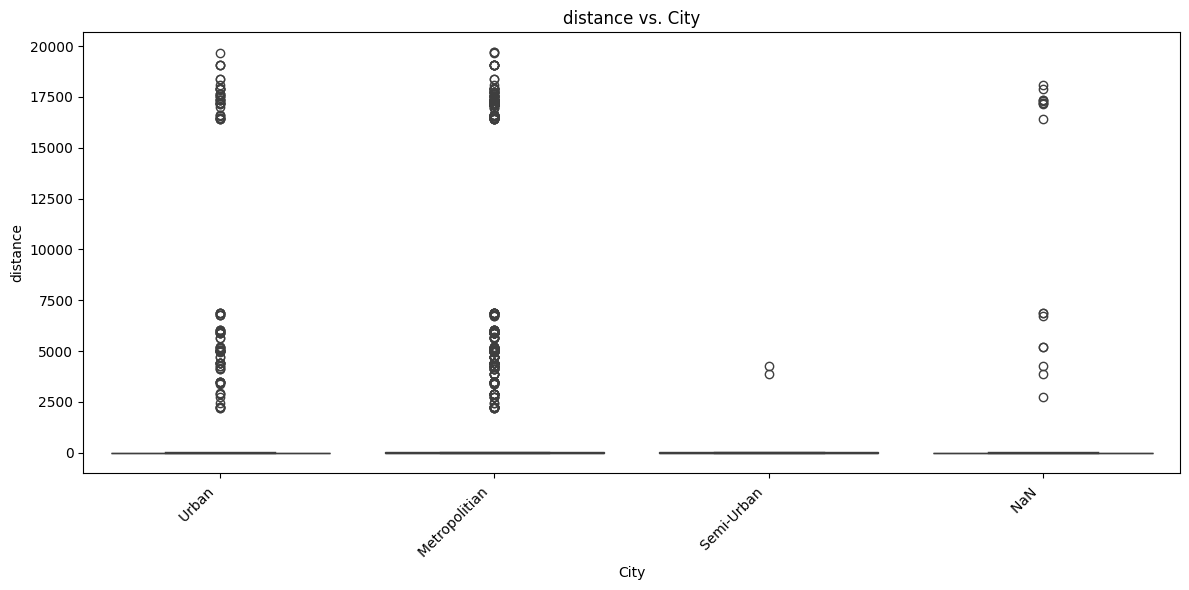

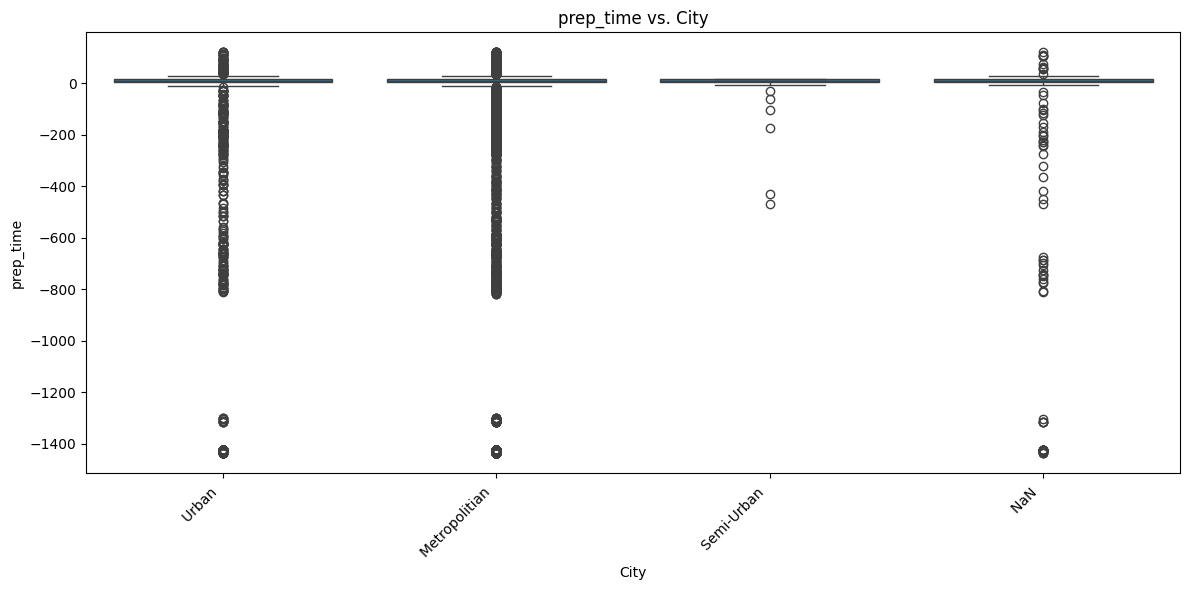

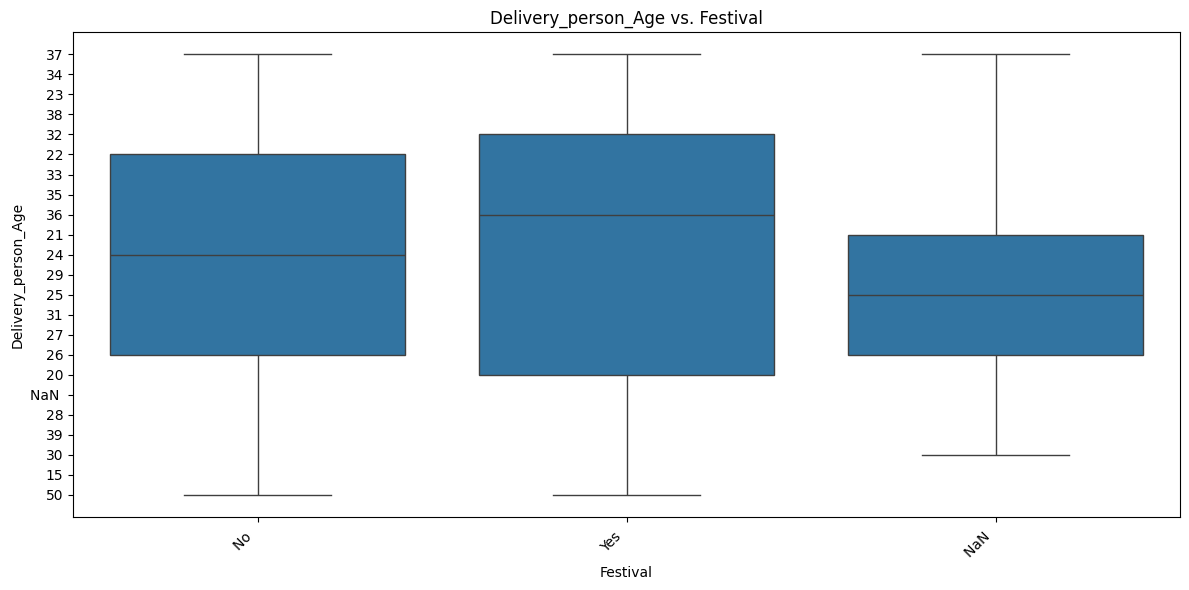

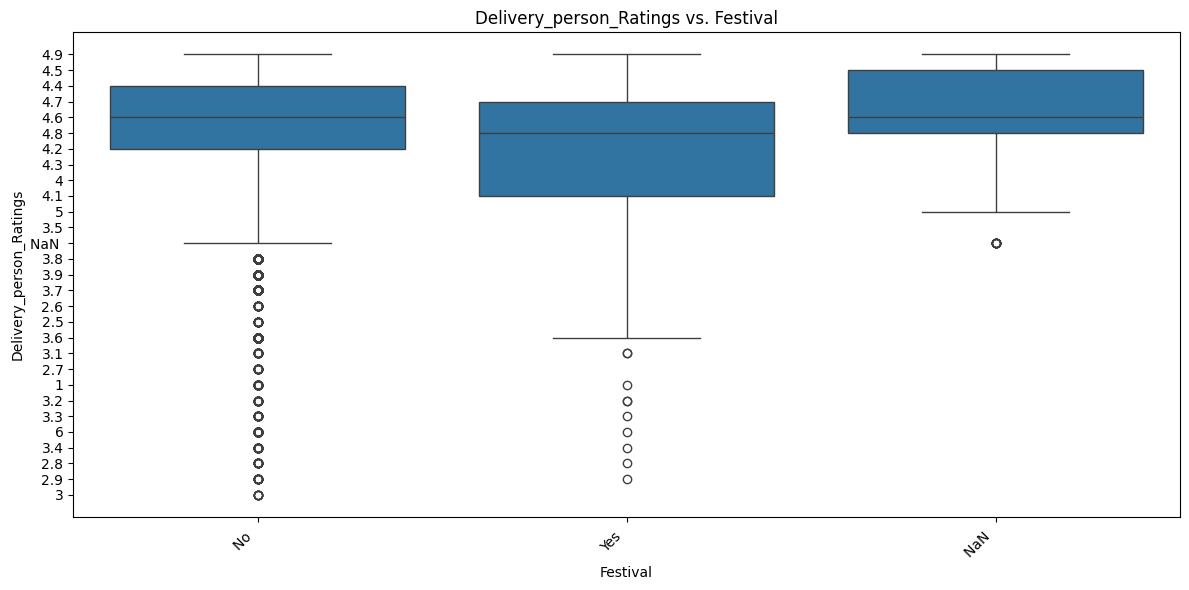

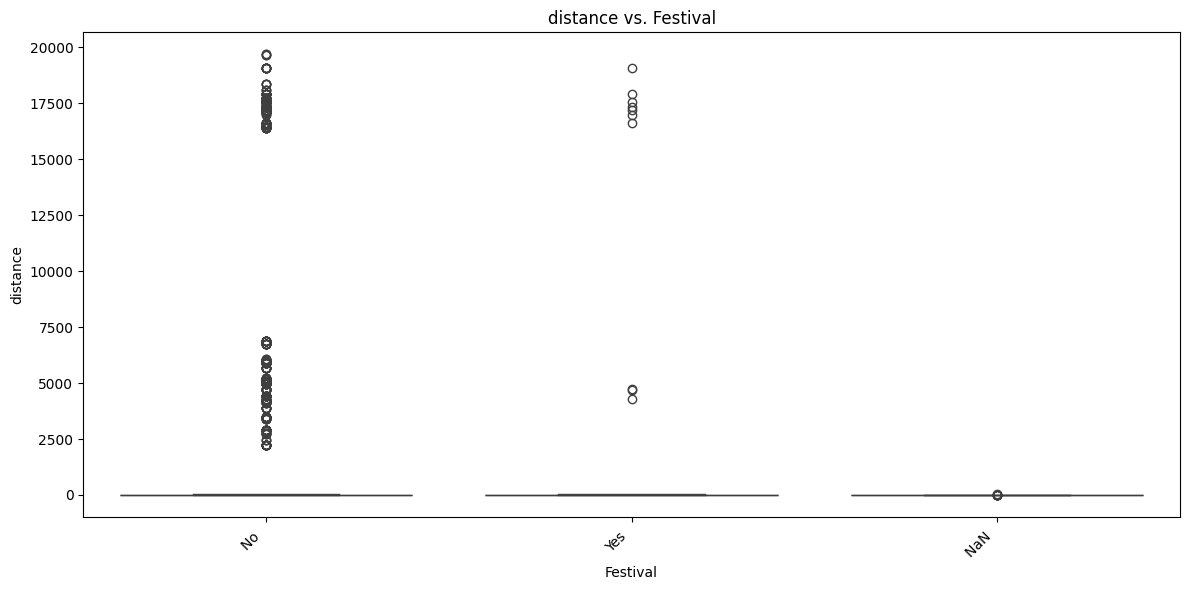

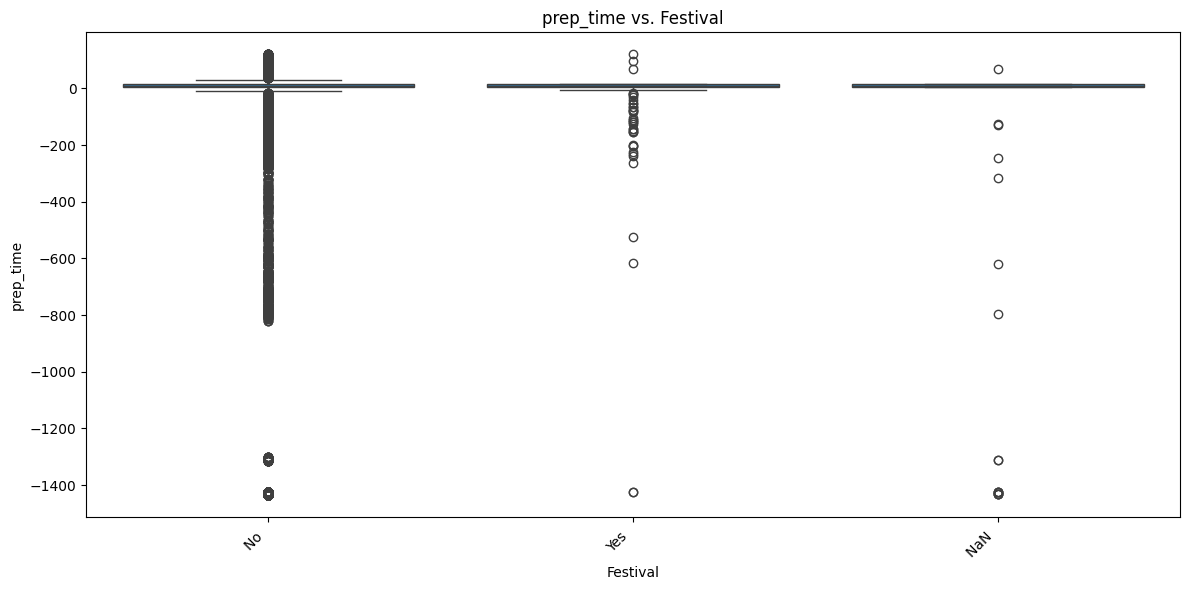

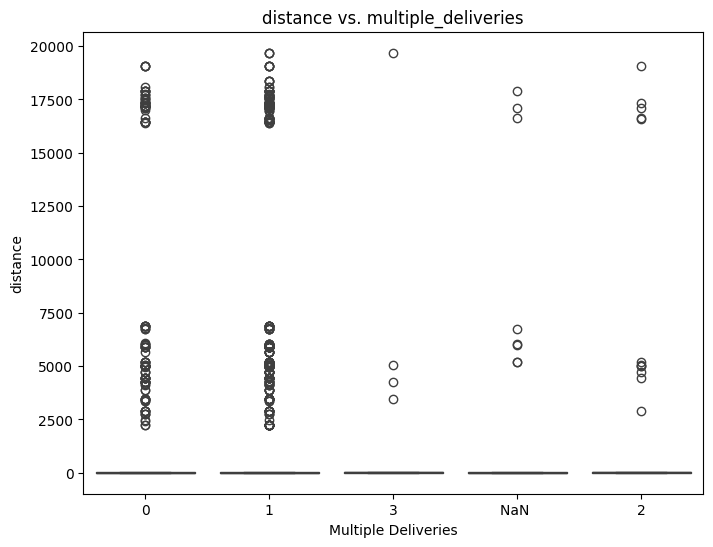

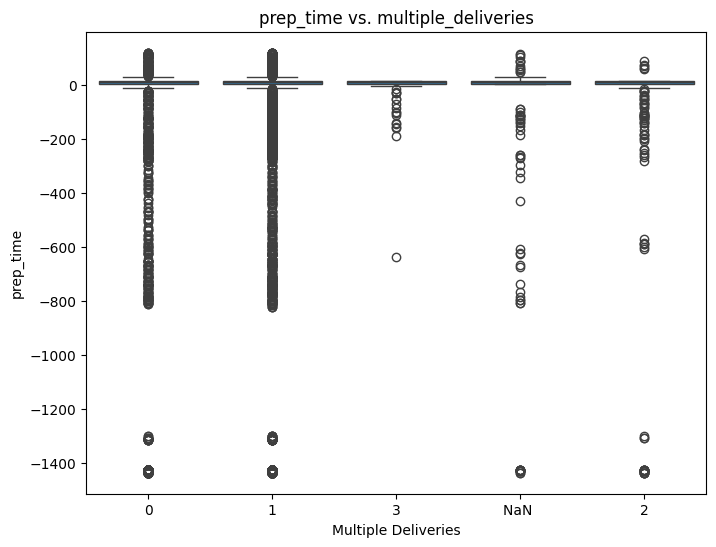

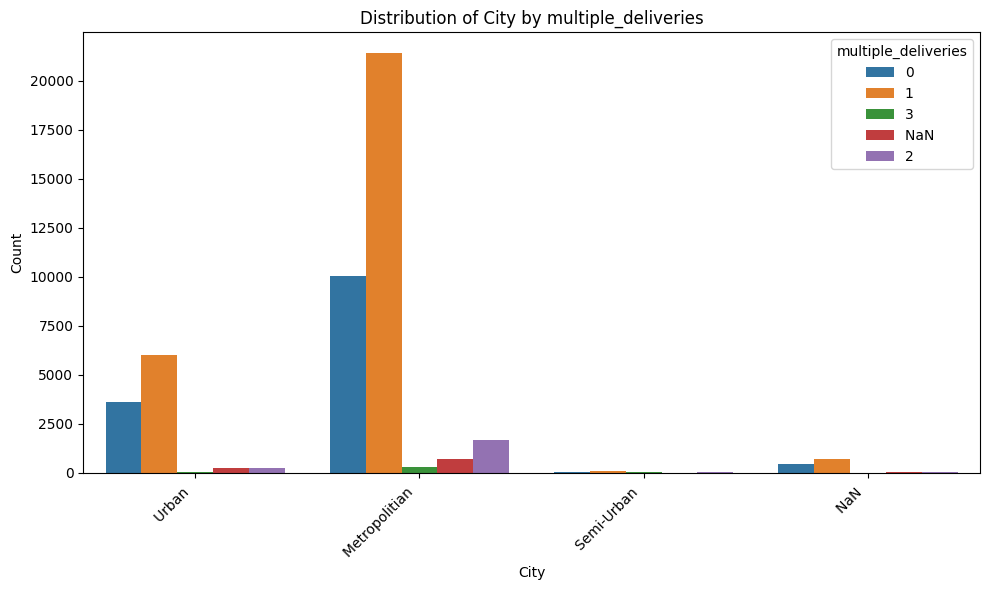

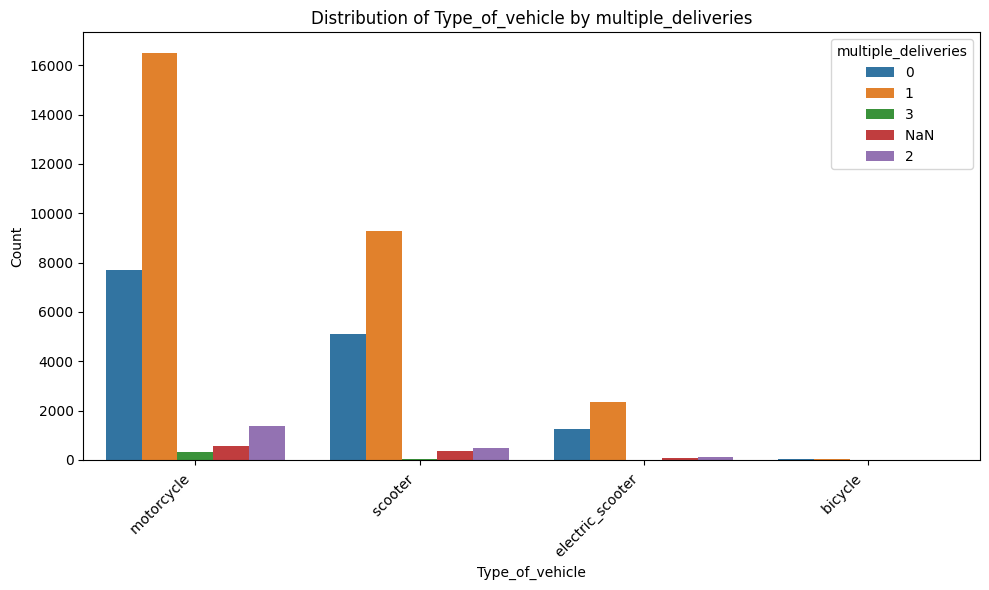


Cross-tabulation of City and multiple_deliveries:


multiple_deliveries      0      1     2    3  NaN 
City                                              
Metropolitian        10026  21395  1683  283   706
NaN                    447    686    29    4    34
Semi-Urban              24     77    22   41     0
Urban                 3598   6001   251   33   253


Cross-tabulation of Type_of_vehicle and multiple_deliveries:


multiple_deliveries     0      1     2    3  NaN 
Type_of_vehicle                                  
bicycle                20     43     4    0     1
electric_scooter     1262   2333   130    8    81
motorcycle           7700  16508  1361  322   544
scooter              5113   9275   490   31   367

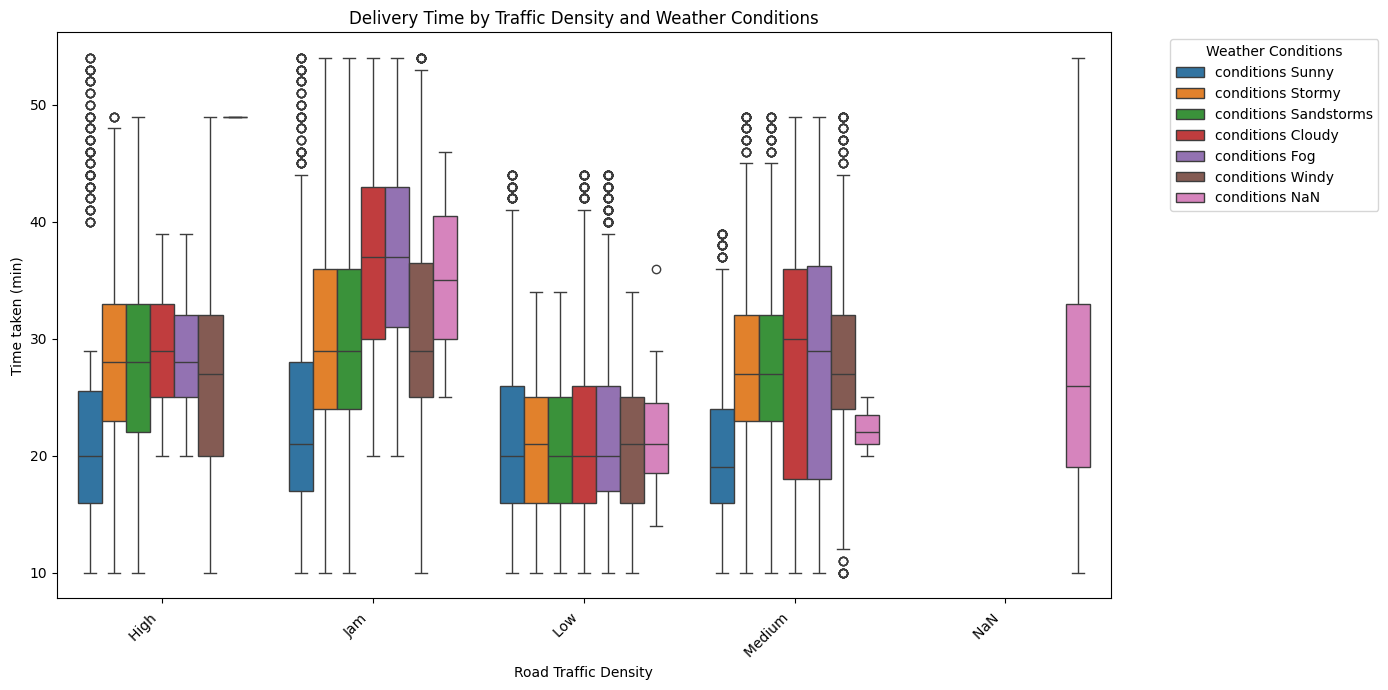


Average Delivery Time by Traffic Density and Weather Conditions:


Weatherconditions     conditions Cloudy  conditions Fog  conditions NaN  \
Road_traffic_density                                                      
High                          28.940860       28.426546       49.000000   
Jam                           36.689655       36.806916       35.333333   
Low                           22.208445       22.303427       22.250000   
Medium                        28.483134       28.044816       22.333333   
NaN                                 NaN             NaN       26.542429   

Weatherconditions     conditions Sandstorms  conditions Stormy  \
Road_traffic_density                                             
High                              27.711840          27.845839   
Jam                               30.018758          29.850194   
Low                               20.297049          20.681734   
Medium                            27.738522          27.680502   
NaN                                     NaN                NaN   

Weatherconditions     conditions Sunny  conditions Windy  
Road_traffic_density                                      
High                         23.448980         26.972789  
Jam                          23.082132         30.219056  
Low                          21.449293         20.665862  
Medium                       20.195518         27.888769  
NaN                                NaN               NaN

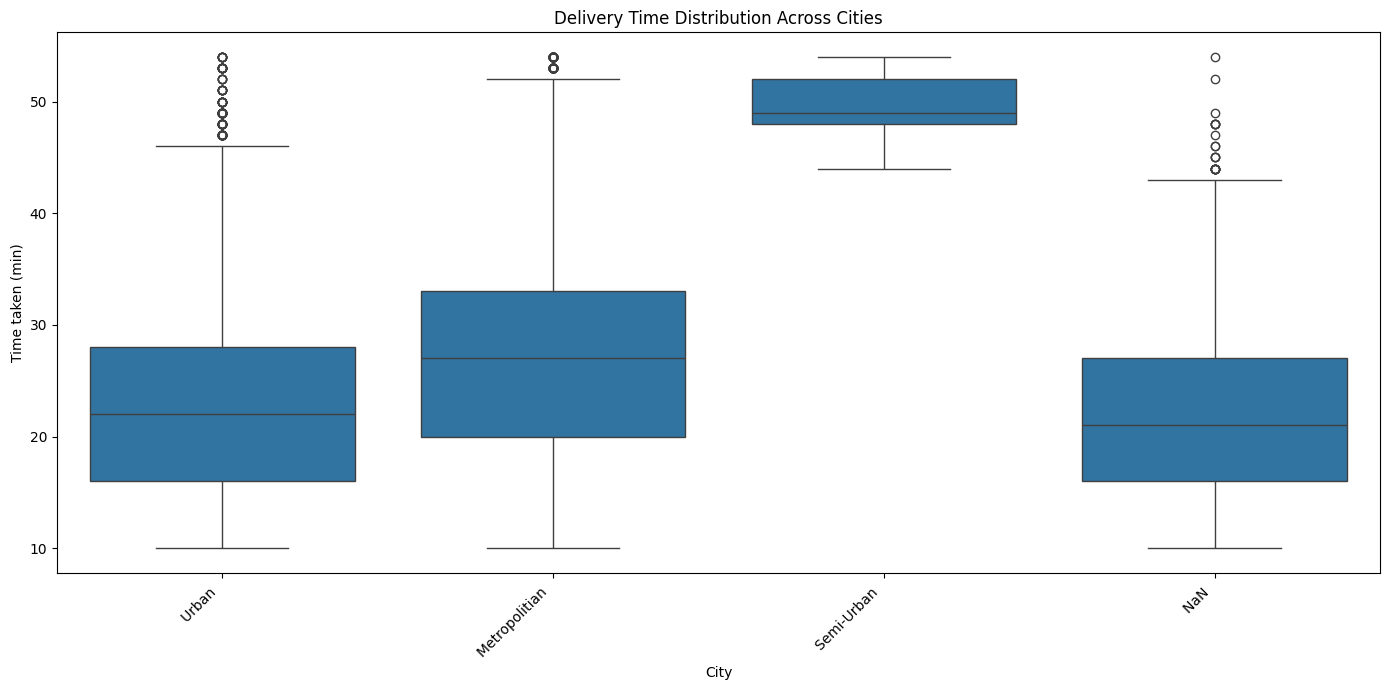

/tmp/ipython-input-2796465890.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_per_city.index, y=avg_time_per_city.values, palette='viridis')


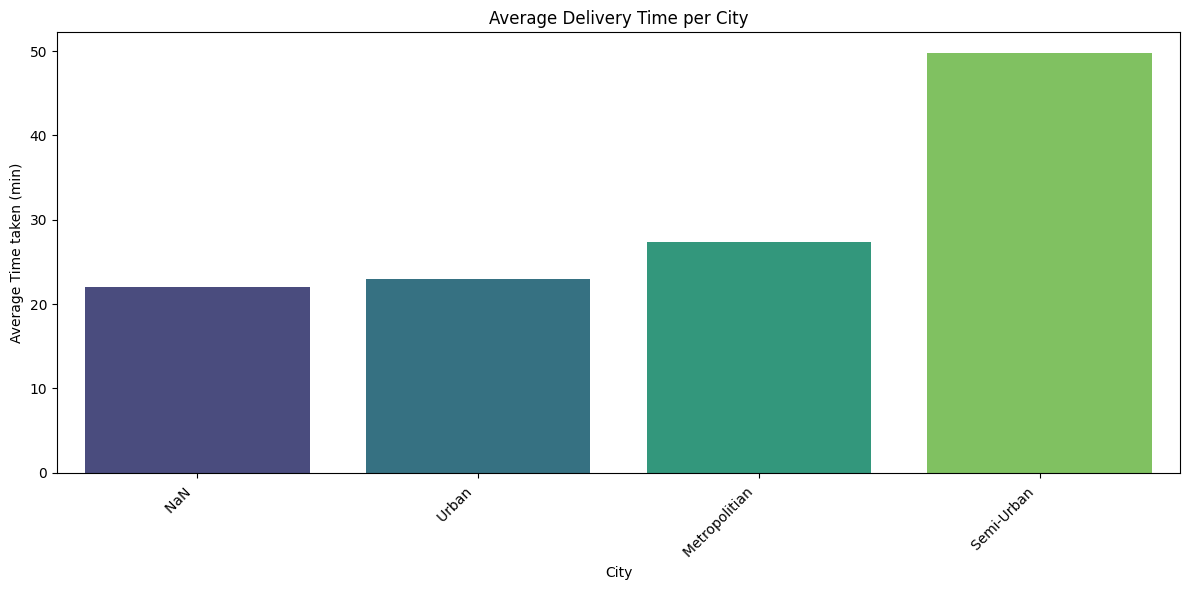

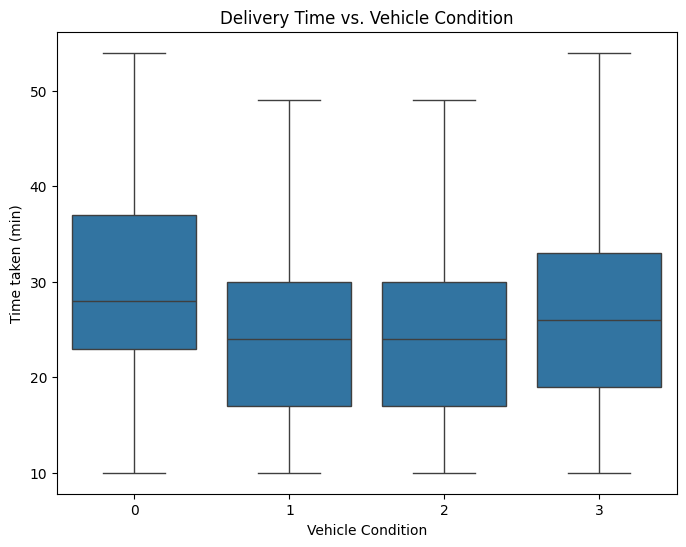


Average Delivery Time by Vehicle Condition:


Vehicle_condition
1    24.355090
2    24.455434
3    26.492308
0    30.072223
Name: Time_taken(min), dtype: float64

In [10]:
# <ANALYSIS_CATEGORICAL_NUMERICAL>
# Analyze relationships between categorical features and numerical features (excluding target)
categorical_features = ['Road_traffic_density', 'Weatherconditions', 'Type_of_order',
                        'Type_of_vehicle', 'time_of_day', 'City', 'Festival']
numerical_features_no_target = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance', 'prep_time']

for cat_feature in categorical_features:
    for num_feature in numerical_features_no_target:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cat_feature, y=num_feature, data=df)
        plt.title(f'{num_feature} vs. {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
# </ANALYSIS_CATEGORICAL_NUMERICAL>

# <ANALYSIS_MULTIPLE_DELIVERIES>
# Analyze the relationship between multiple deliveries and other features
# Numerical features vs multiple_deliveries
numerical_features_multi = ['distance', 'prep_time']
for num_feature in numerical_features_multi:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='multiple_deliveries', y=num_feature, data=df)
    plt.title(f'{num_feature} vs. multiple_deliveries')
    plt.xlabel('Multiple Deliveries')
    plt.ylabel(num_feature)
    plt.show()

# Categorical features vs multiple_deliveries (using count plots for distribution)
categorical_features_multi = ['City', 'Type_of_vehicle']
for cat_feature in categorical_features_multi:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_feature, hue='multiple_deliveries', data=df)
    plt.title(f'Distribution of {cat_feature} by multiple_deliveries')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Cross-tabulation for more precise counts/proportions
for cat_feature in categorical_features_multi:
    print(f"\nCross-tabulation of {cat_feature} and multiple_deliveries:")
    display(pd.crosstab(df[cat_feature], df['multiple_deliveries']))

# </ANALYSIS_MULTIPLE_DELIVERIES>

# <ANALYSIS_WEATHER_TRAFFIC>
# Analyze the impact of weather conditions and traffic density on delivery time more closely
# Grouped box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', hue='Weatherconditions', data=df)
plt.title('Delivery Time by Traffic Density and Weather Conditions')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time taken (min)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Consider mean delivery time for combinations
weather_traffic_time = df.groupby(['Road_traffic_density', 'Weatherconditions'])['Time_taken(min)'].mean().reset_index()
print("\nAverage Delivery Time by Traffic Density and Weather Conditions:")
display(weather_traffic_time.pivot(index='Road_traffic_density', columns='Weatherconditions', values='Time_taken(min)'))

# </ANALYSIS_WEATHER_TRAFFIC>

# <ANALYSIS_CITY_DELIVERY_TIME>
# Explore the distribution of delivery times across different cities
plt.figure(figsize=(14, 7))
sns.boxplot(x='City', y='Time_taken(min)', data=df)
plt.title('Delivery Time Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Time taken (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and visualize average delivery time per city
avg_time_per_city = df.groupby('City')['Time_taken(min)'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_time_per_city.index, y=avg_time_per_city.values, palette='viridis')
plt.title('Average Delivery Time per City')
plt.xlabel('City')
plt.ylabel('Average Time taken (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# </ANALYSIS_CITY_DELIVERY_TIME>

# <ANALYSIS_VEHICLE_CONDITION>
# Analyze the impact of vehicle condition on delivery time
plt.figure(figsize=(8, 6))
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)', data=df)
plt.title('Delivery Time vs. Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Time taken (min)')
plt.show()

# Calculate average delivery time per vehicle condition
avg_time_per_vehicle_condition = df.groupby('Vehicle_condition')['Time_taken(min)'].mean().sort_values()
print("\nAverage Delivery Time by Vehicle Condition:")
display(avg_time_per_vehicle_condition)

# </ANALYSIS_VEHICLE_CONDITION>

## Summary:

### Data Analysis Key Findings

*   The distribution of delivery time ('Time\_taken(min)') is centered around approximately 26.3 minutes with a standard deviation of about 9.4 minutes.
*   'distance', 'prep\_time', and 'Order\_hour' show some correlation with 'Time\_taken(min)'.
*   Delivery time varies across categories of 'Road\_traffic\_density', 'Weatherconditions', 'Type\_of\_order', 'Type\_of\_vehicle', 'time\_of\_day', 'City', and 'Festival'.
*   Certain traffic densities and weather conditions are associated with longer delivery times.
*   Average delivery time varies significantly between cities.
*   'Vehicle\_condition' appears to have an impact on delivery time.

### Insights or Next Steps

*   Investigate specific combinations of 'Road\_traffic\_density' and 'Weatherconditions' that result in significantly longer delivery times to identify critical operational bottlenecks.
*   Analyze the differences in average delivery times across cities to understand city-specific factors contributing to variations and potentially optimize logistics in slower cities.


# New Section